# Fitbit Steps Analysis

#### Aubrey Roberts (Created 8/20/24)

In [4]:
# Load packages
import random
import os, glob
import pandas as pd
from datetime import datetime, timedelta
import json 
from IPython.display import display, HTML
import matplotlib.pyplot as plt

#initialization
random.seed(1000)

In [21]:
# Read in participant step data
participant = "019_qtz1b17236523485537658"
step_path = f"/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/st/WearableFitbit-Fitbit/{participant}_st_WearableFitbit_Fitbit.csv"
step_df = pd.read_csv(step_path)

In [22]:
# Explore df
step_df.head()
print("Unique dates with step data:", len(step_df['start_date'].unique()))

# Summarize steps for each day
group_df= step_df.groupby('start_date')['value'].sum()
group_df=pd.DataFrame(group_df)
# Calculate mean steps for this person
mean_steps = group_df['value'].mean()

Unique dates with HR data: 88


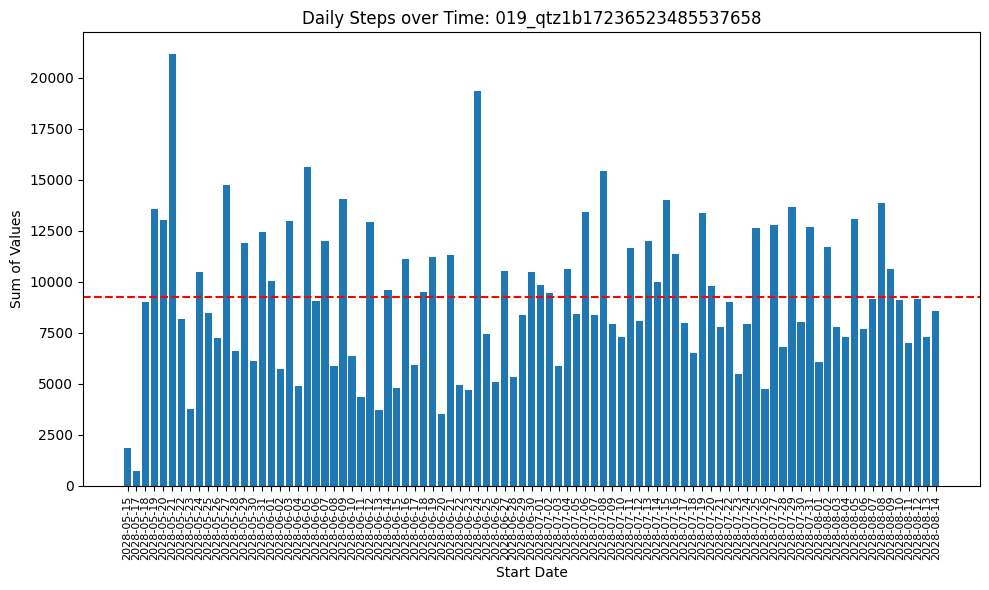

1

In [7]:
## Make plot to visualize steps over time
group_df= step_df.groupby('start_date')['value'].sum()
plt.figure(figsize=(10, 6))
plt.bar(group_df.index, group_df.values)  # Line plot
# plt.bar(group_df.index, group_df.values)  # For bar plot, uncomment this line instead

plt.xlabel('Start Date')
plt.ylabel('Sum of Values')
plt.title(f'Daily Steps over Time: {participant}')
plt.axhline(y=mean_steps, color='r', linestyle='--', label=f'Mean = {mean_steps:.2f}')
plt.xticks(rotation=90, fontsize=8)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


step_path = f"/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/st/WearableFitbit-Fitbit/019_qtz1b17236523485537658_st_WearableFitbit_Fitbit.csv"

step_df = pd.read_csv(step_path)
step_df['randomization_group'][1]

### Function for plotting steps

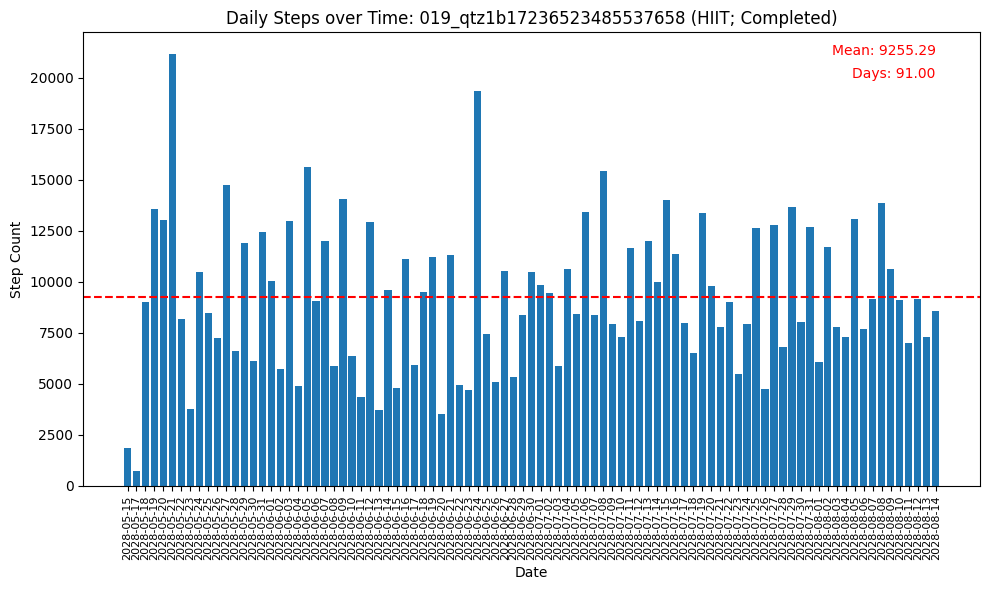

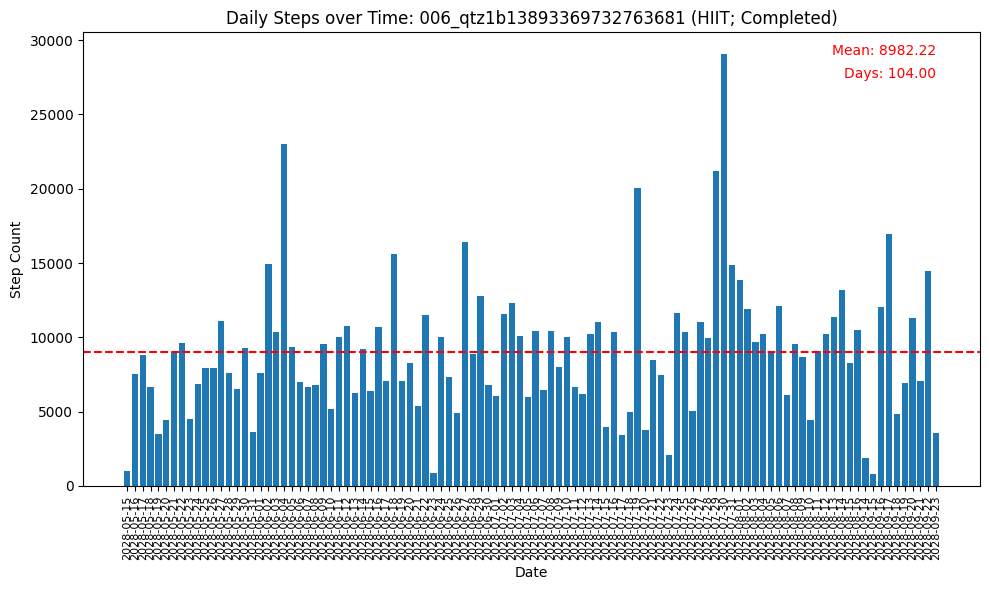

In [9]:
# Generalize into function
def plot_steps(participant):
    step_path = f"/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/st/WearableFitbit-Fitbit/{participant}_st_WearableFitbit_Fitbit.csv"

    step_df = pd.read_csv(step_path)

    # Recode enrollment status and rand group
    step_df['enrollment_status']=step_df['enrollment_status'].replace({4: "On-going Randomized", 5: 'Completed', 6: 'Withdrawn', 7: 'Lost to Follow-Up'})
    step_df['randomization_group']=step_df['randomization_group'].replace({1: "HIIT", 2: "MICT", 3: "Control"})
        
    # Get metrics for ppt
    Num_Days = len(step_df['start_date'].unique())
    enroll = step_df['enrollment_status'][1]
    ex_group = step_df['randomization_group'][1]

    # Calculate num steps per day (group by start_date, sum the values for each start_date)
    group_df= step_df.groupby('start_date')['value'].sum()
    group_df=pd.DataFrame(group_df)
    
    # Calculate mean steps for this person
    mean_steps = group_df['value'].mean()
    #print("mean value for steps:", mean_steps)

    # Make plot to visualize steps over time
    group_df= step_df.groupby('start_date')['value'].sum()
    plt.figure(figsize=(10, 6))
    plt.bar(group_df.index, group_df.values)  # Line plot
    # plt.bar(group_df.index, group_df.values)  # For bar plot, uncomment this line instead
    
    plt.xlabel('Date')
    plt.ylabel('Step Count')
    plt.title(f'Daily Steps over Time: {participant} ({ex_group}; {enroll})')
    plt.axhline(y=mean_steps, color='r', linestyle='--', label=f'Mean = {mean_steps:.2f}')
    plt.xticks(rotation=90, fontsize=8)  # Rotate x labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    ymin, ymax = plt.ylim()
    plt.text(x=group_df.index[-1], y=0.95 * ymax,  # Adjust position as needed
         s=f'Mean: {mean_steps:.2f}', color='r', fontsize=10, horizontalalignment='right')
    plt.text(x=group_df.index[-1], y=0.9 * ymax,  # Adjust position as needed
         s=f'Days: {Num_Days:.2f}', color='r', fontsize=10, horizontalalignment='right')
    plt.show()
                
plot_steps("019_qtz1b17236523485537658")
plot_steps("006_qtz1b13893369732763681")



Unique dates with step data: 33
mean value for steps: 6313.939393939394


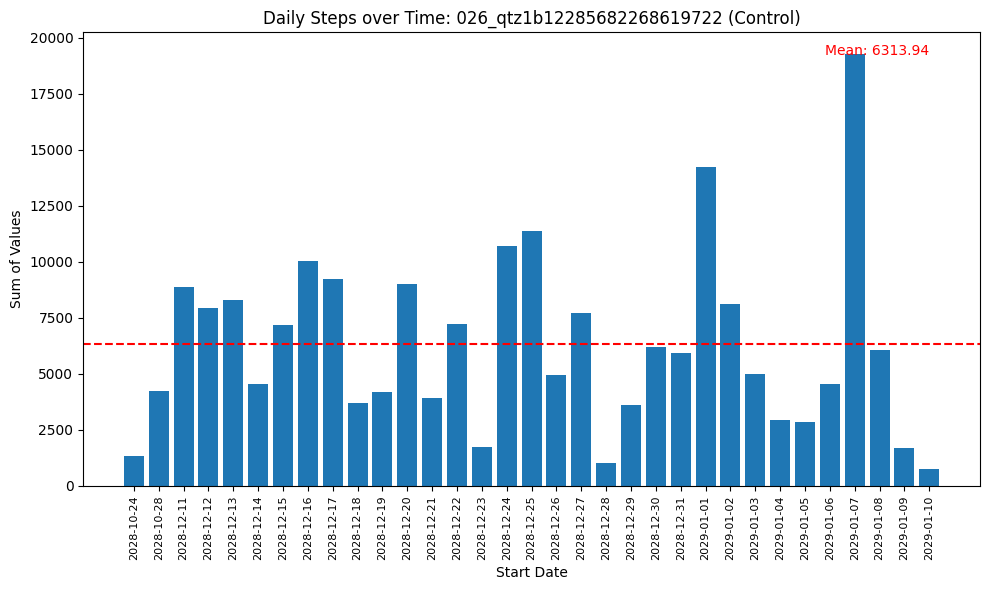

Unique dates with step data: 4
mean value for steps: 7130.25


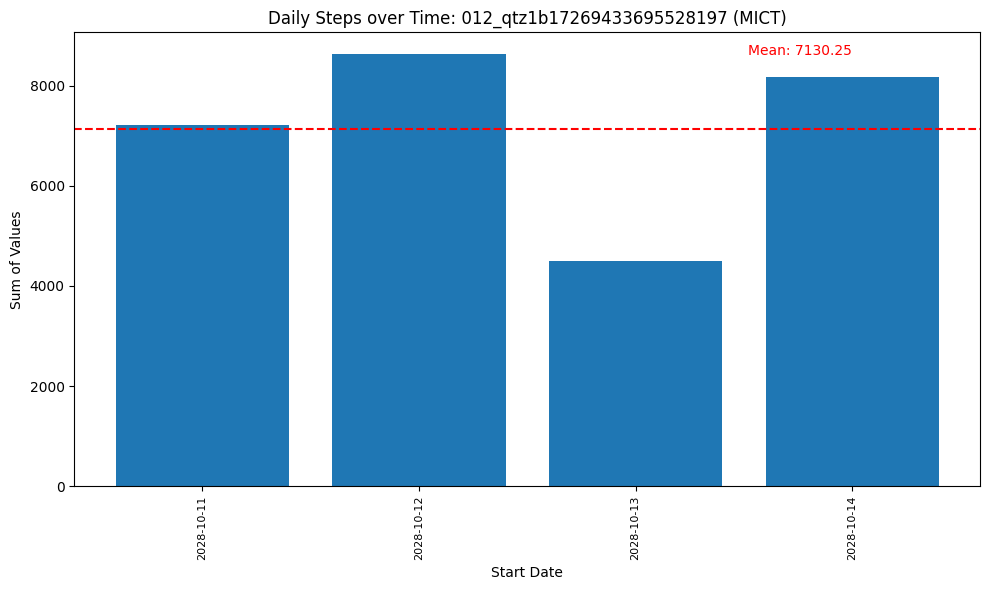

Unique dates with step data: 20
mean value for steps: 3154.15


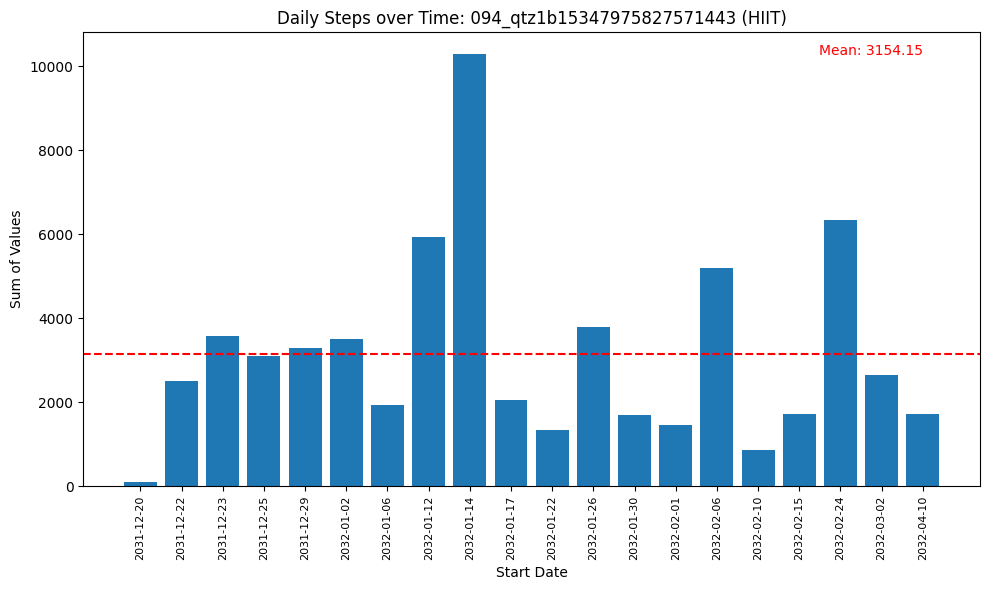

Unique dates with step data: 70
mean value for steps: 8991.857142857143


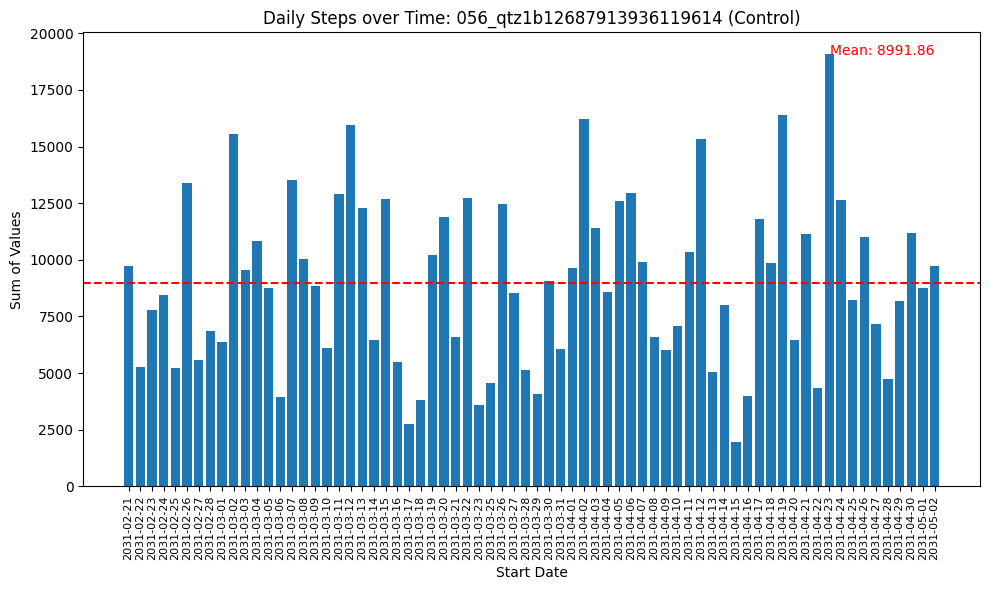

Unique dates with step data: 6
mean value for steps: 6396.166666666667


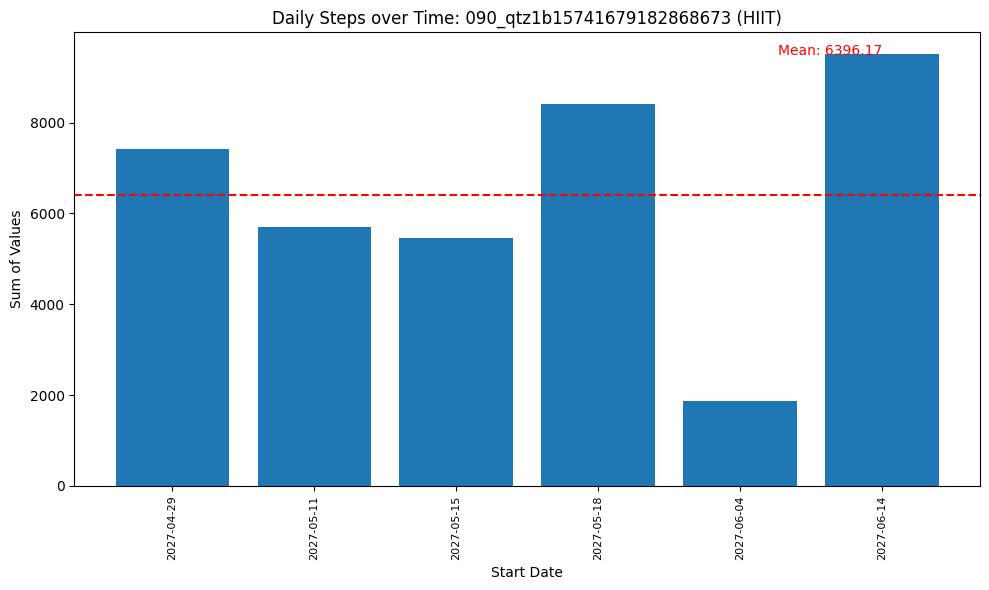

In [161]:
#participants = ['026_qtz1b12285682268619722', '012_qtz1b17269433695528197', '094_qtz1b15347975827571443', '056_qtz1b12687913936119614', '090_qtz1b15741679182868673']

# Loop over the list of pathnames and process each file
#for ppt in participants:
     #plot_steps(ppt)

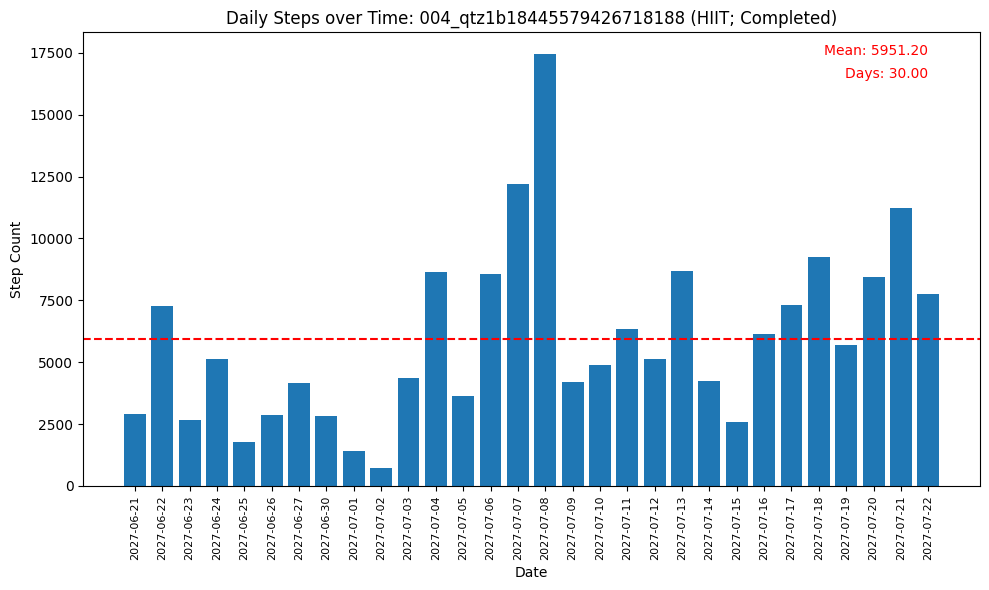

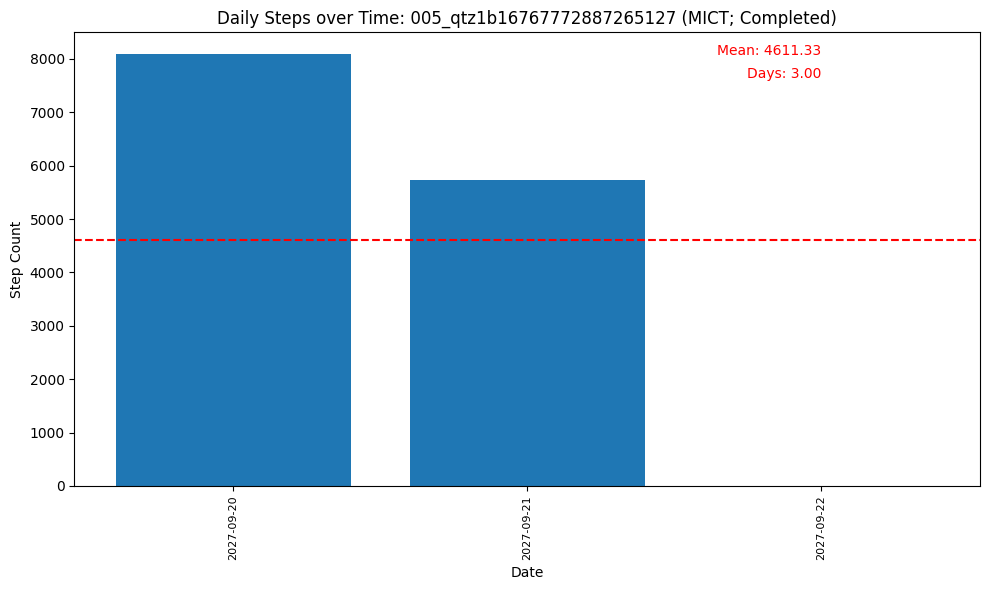

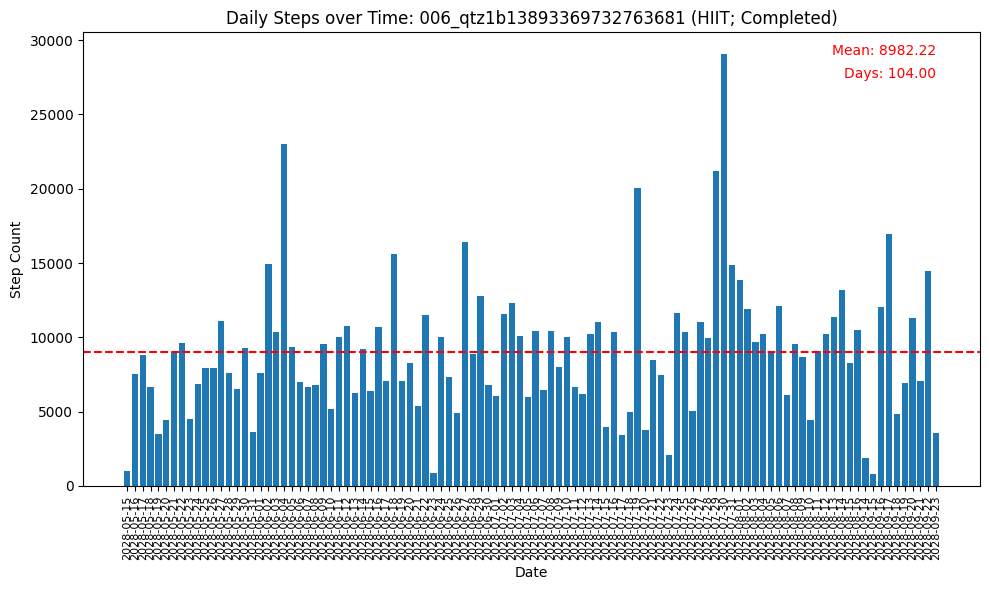

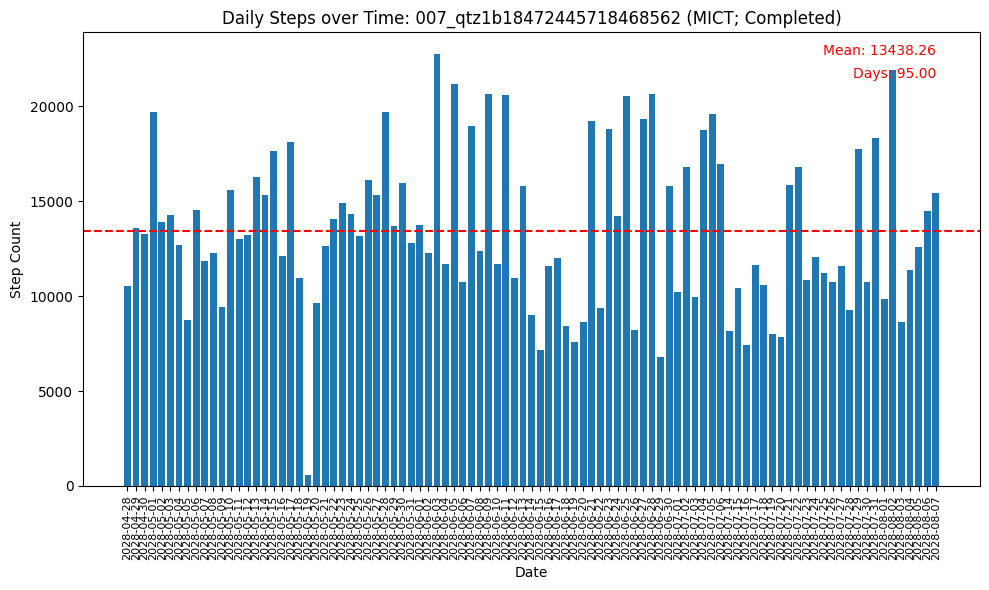

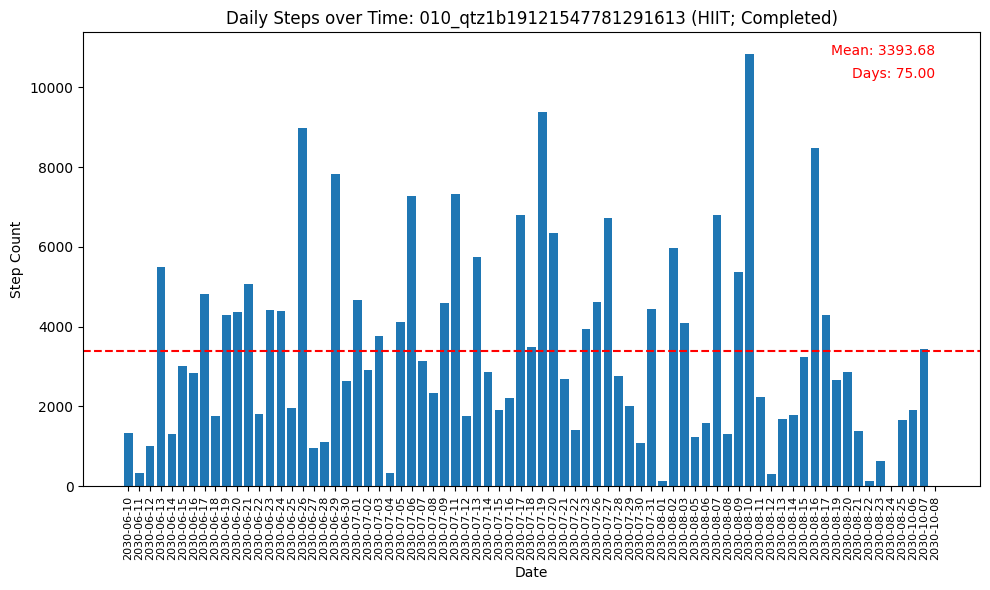

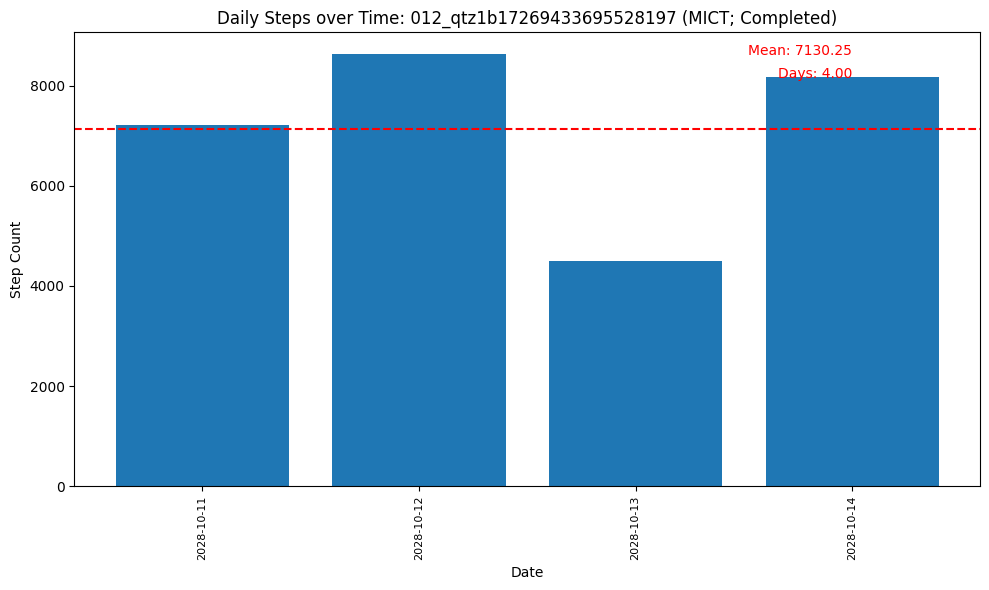

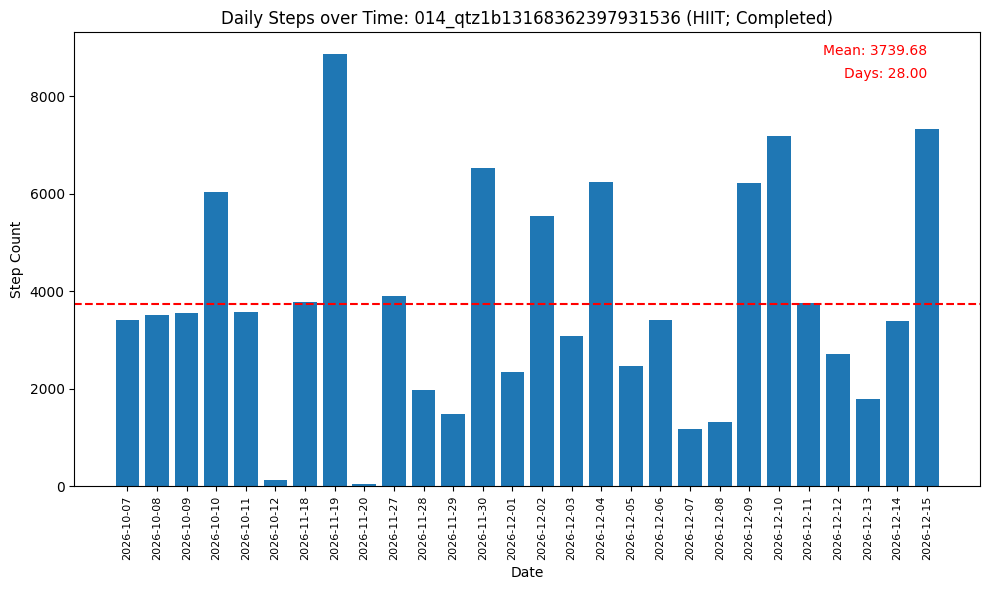

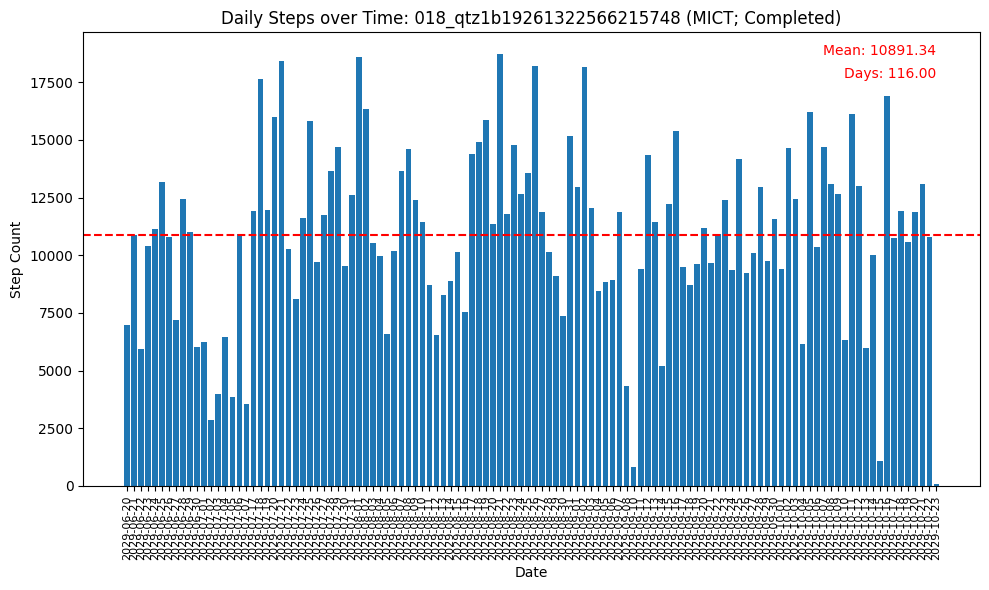

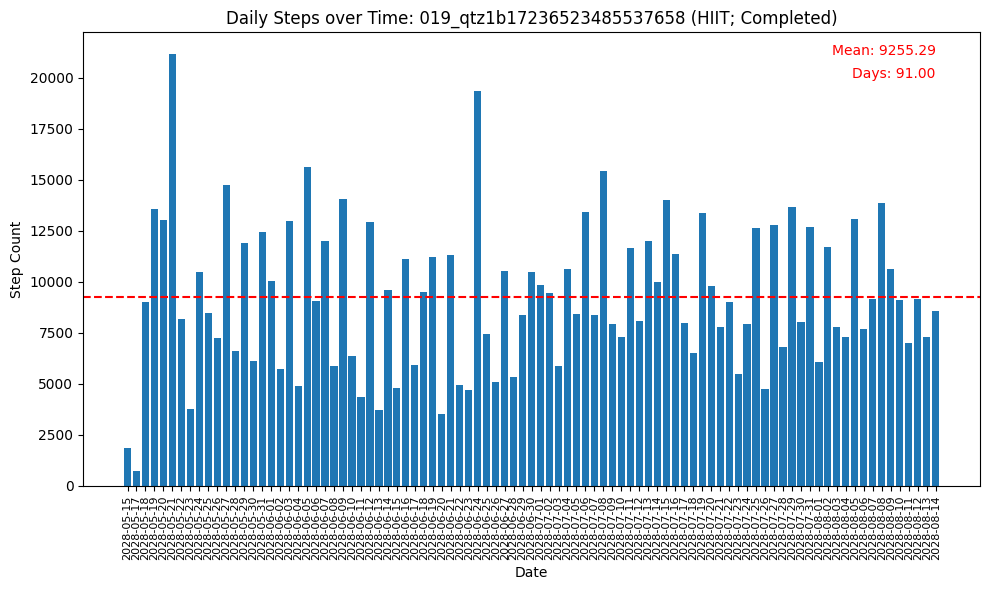

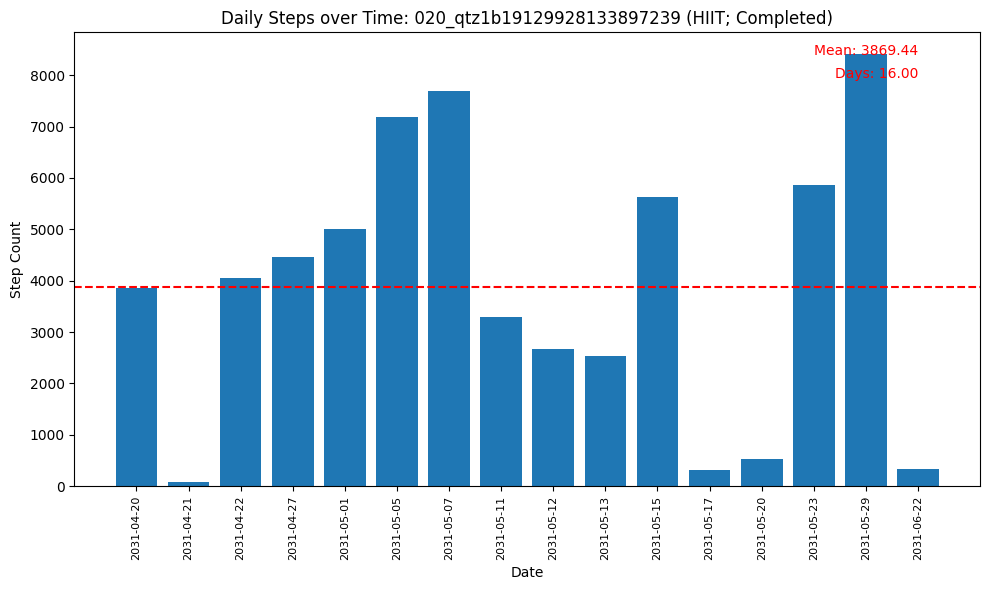

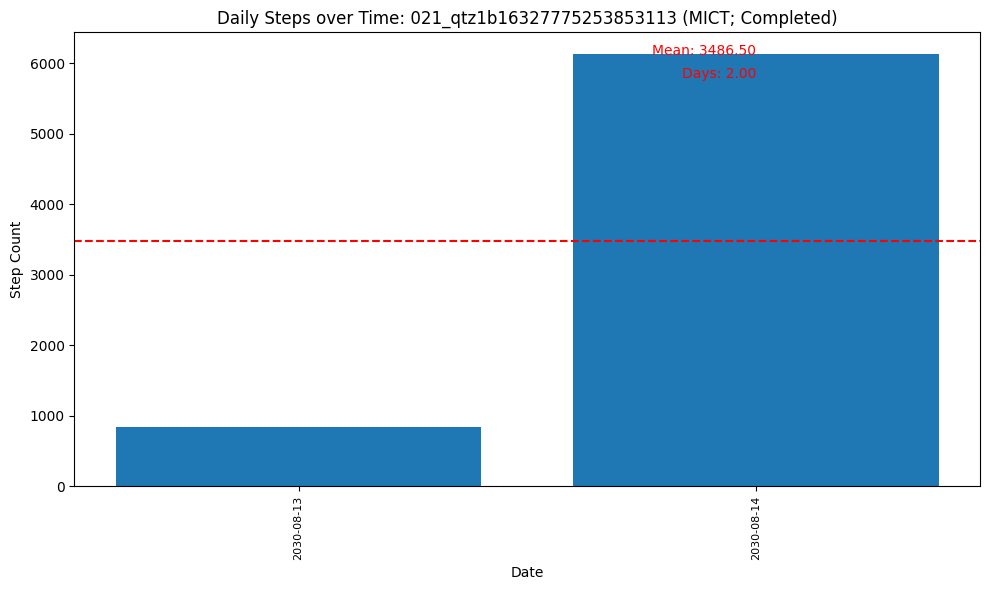

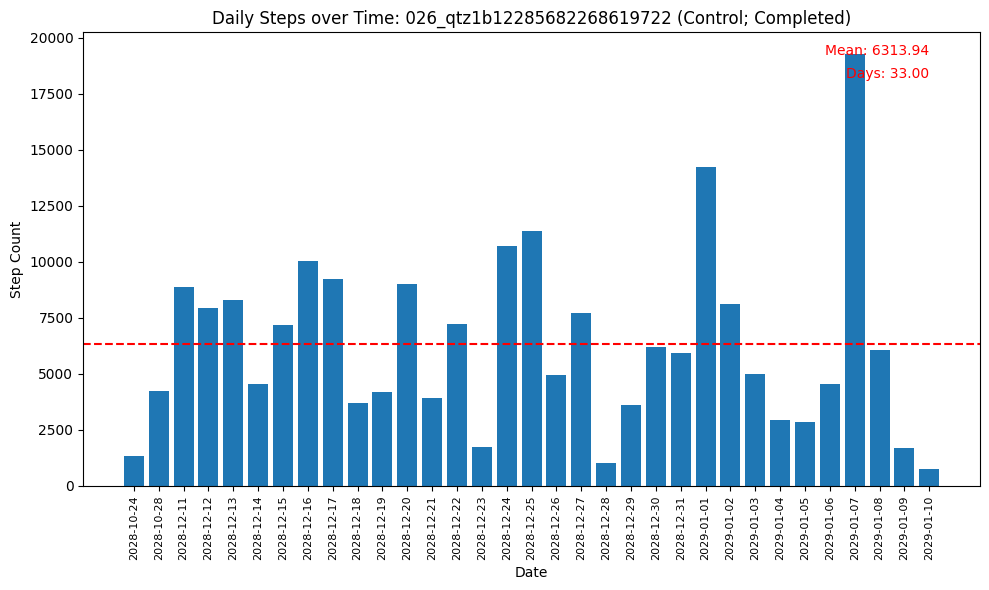

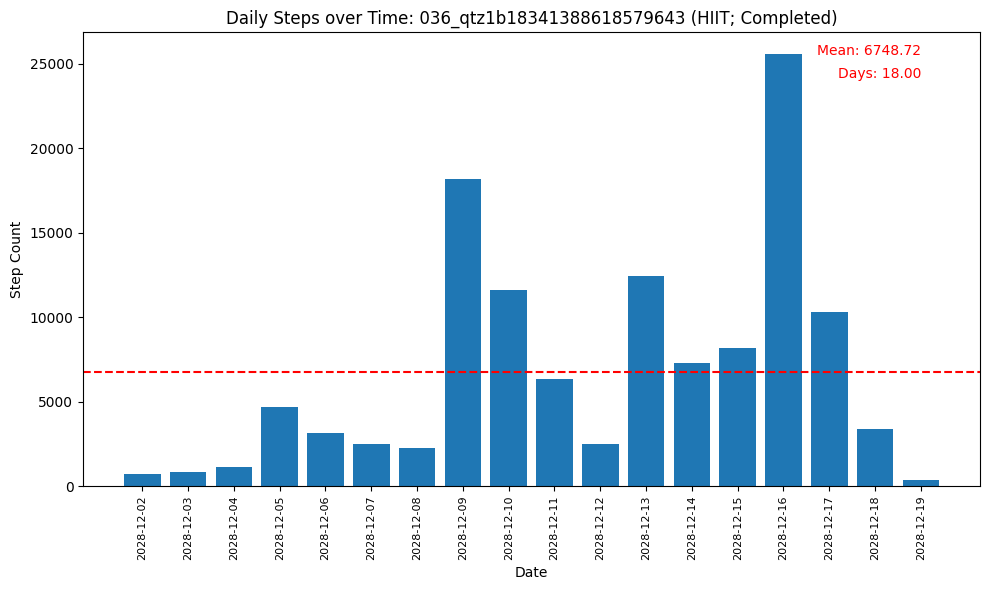

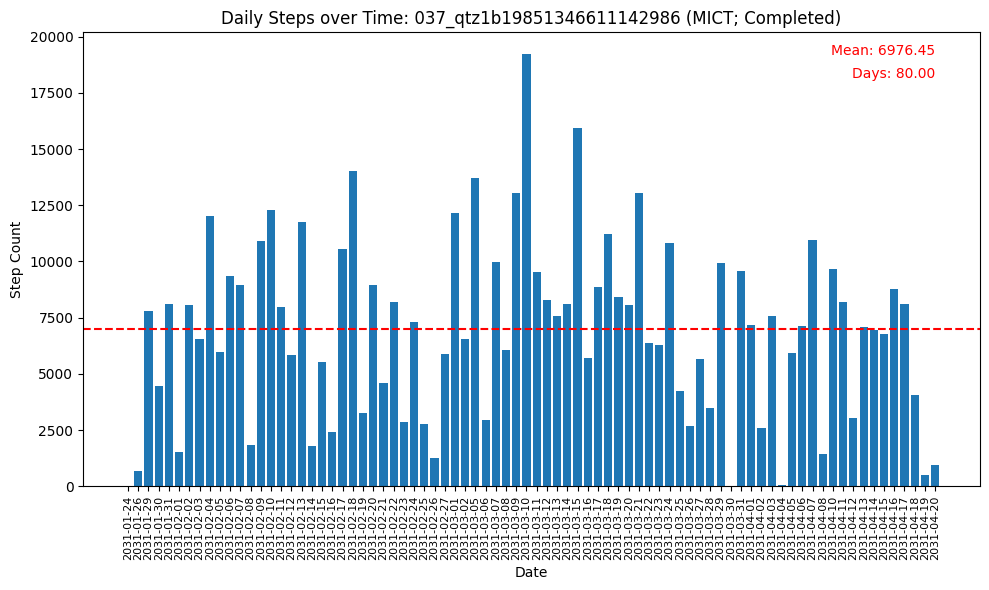

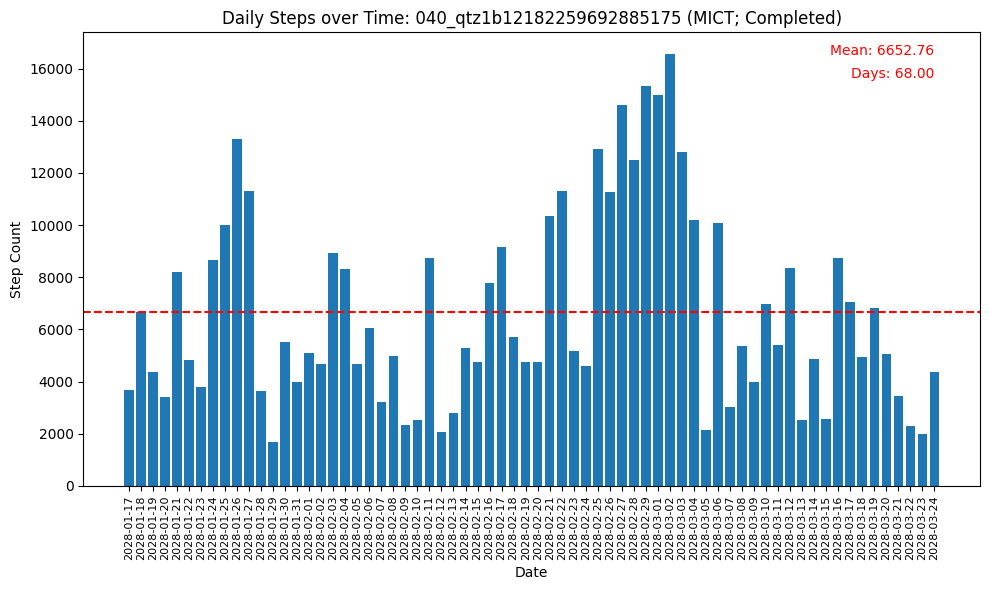

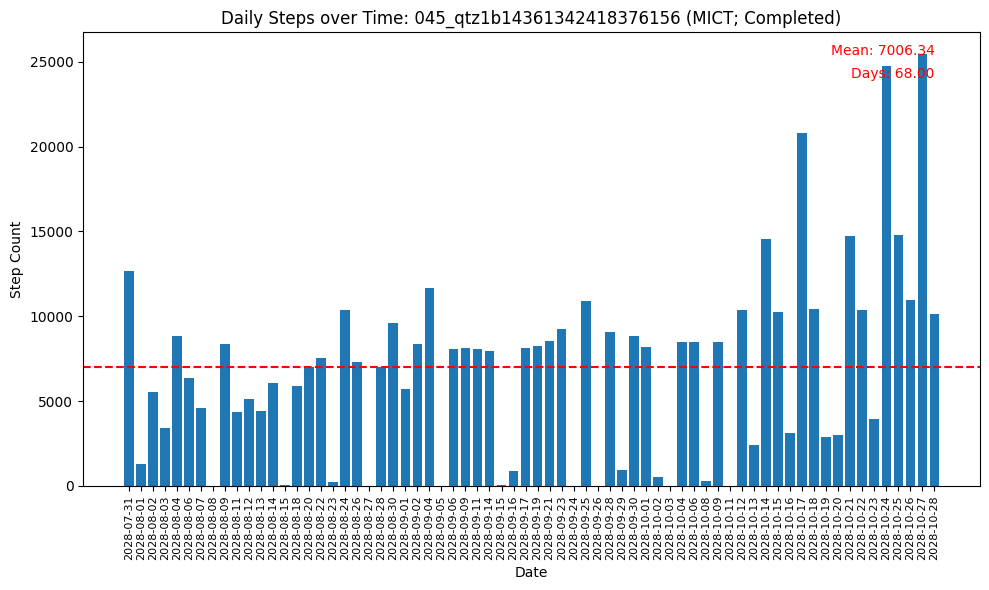

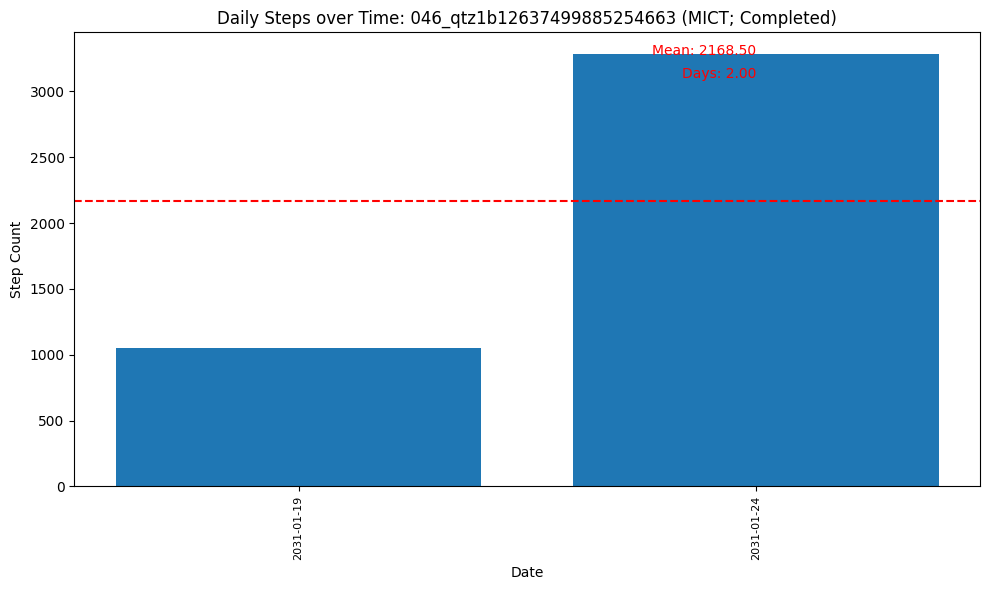

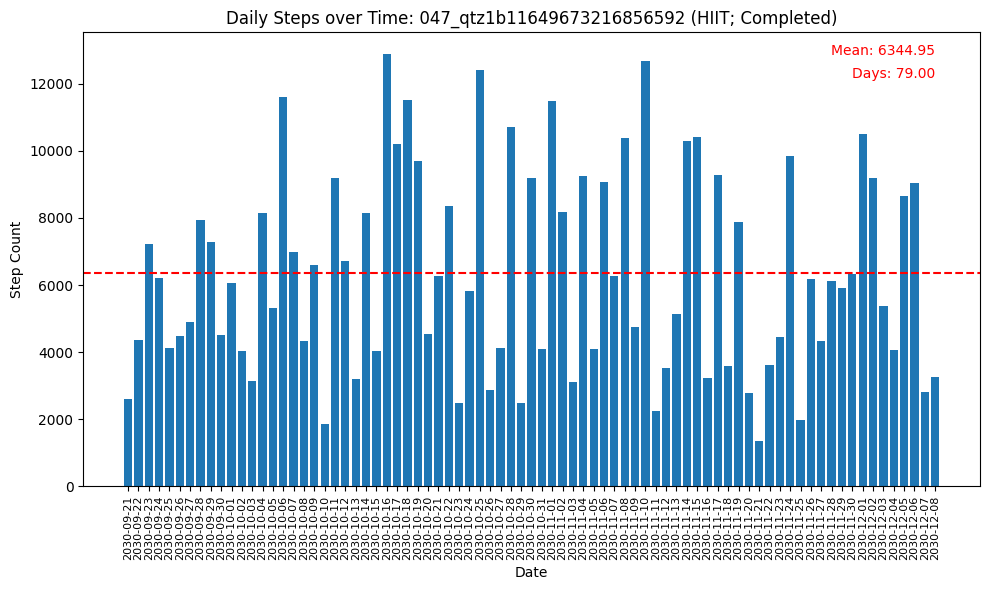

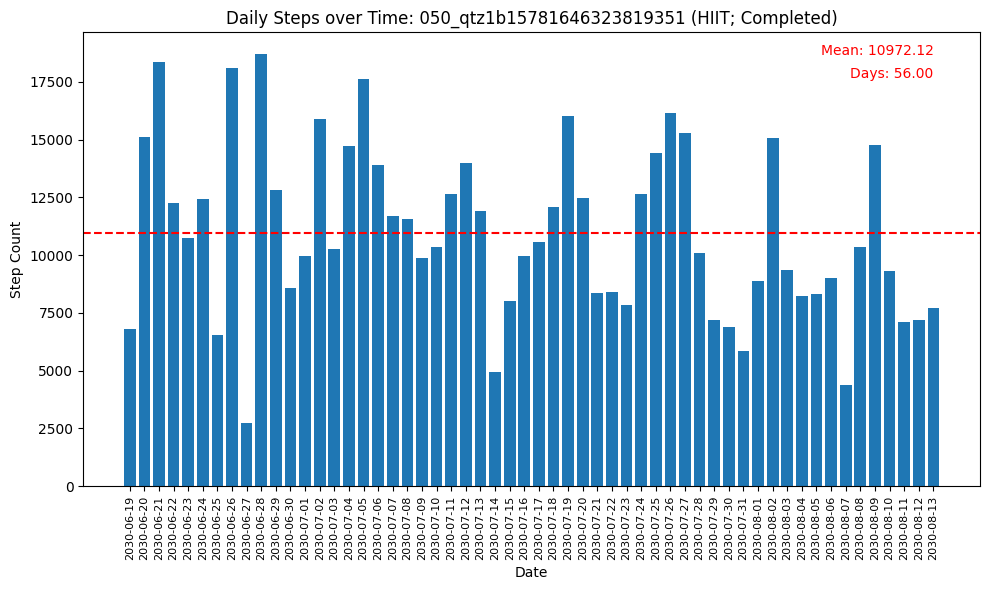

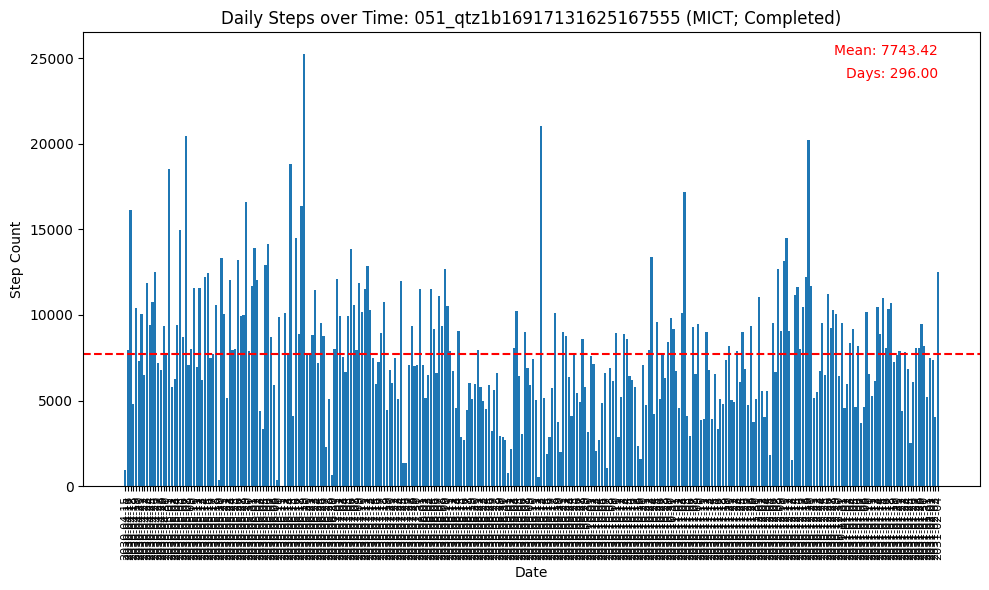

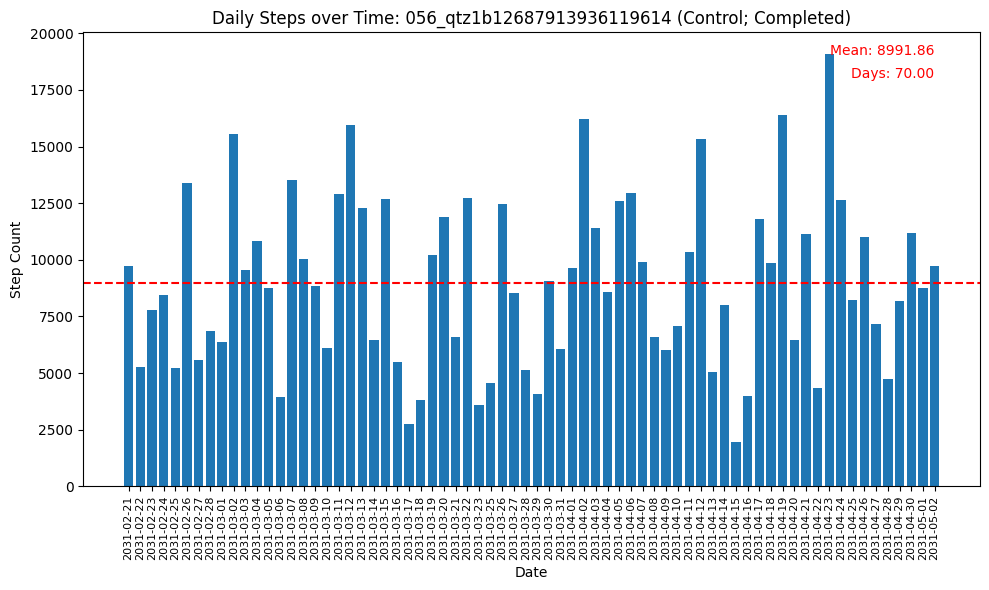

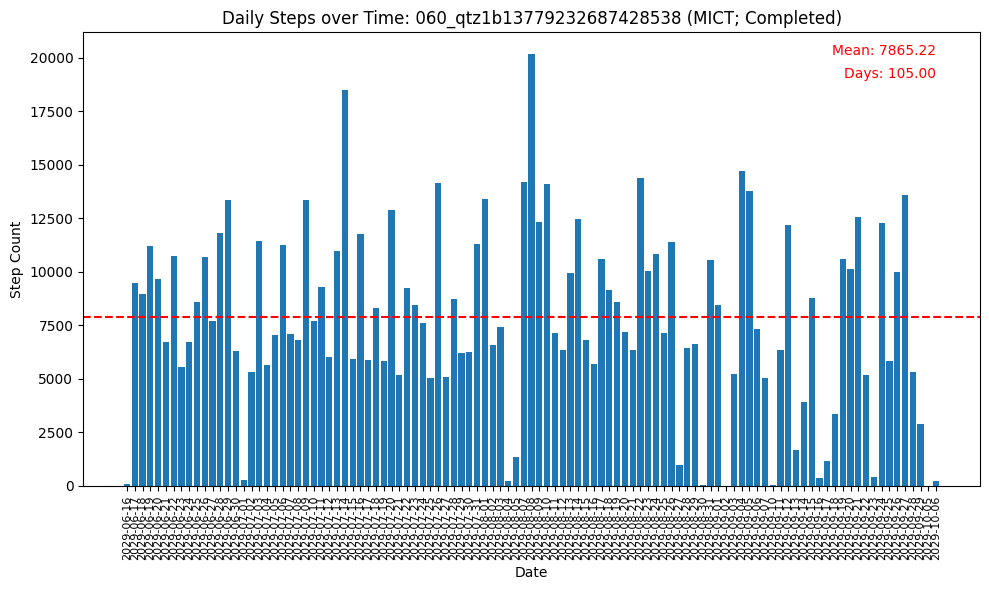

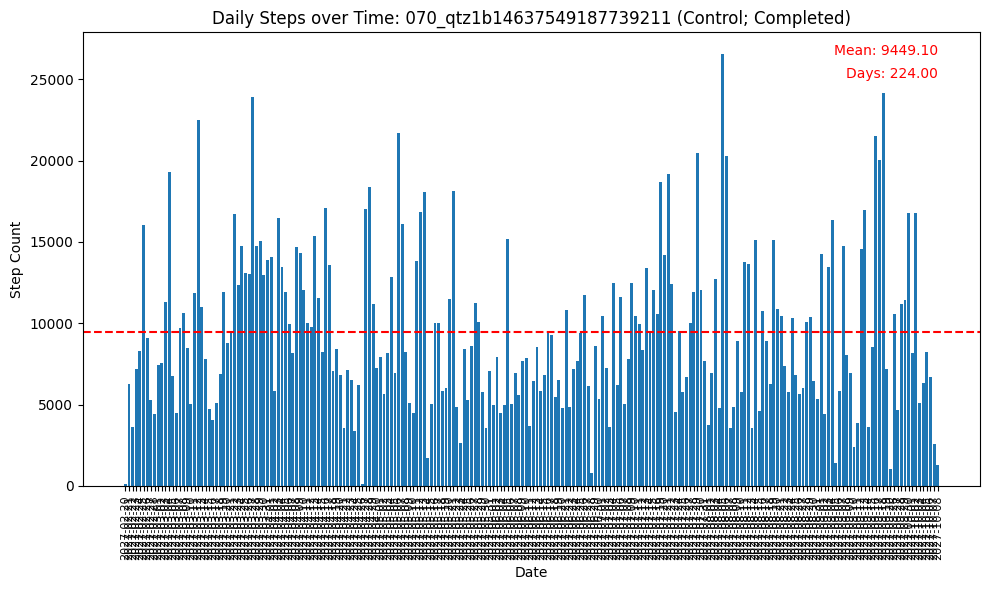

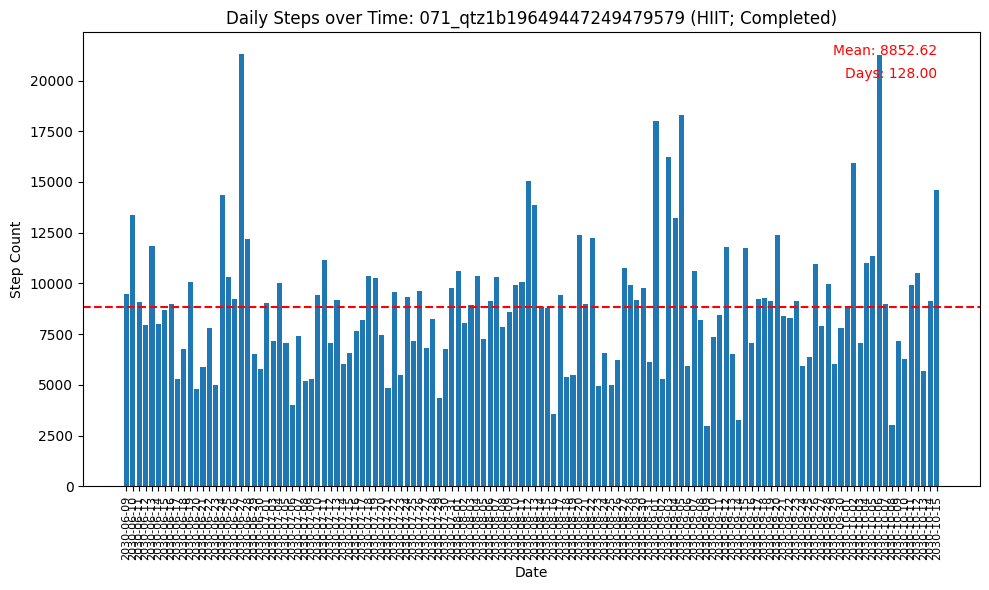

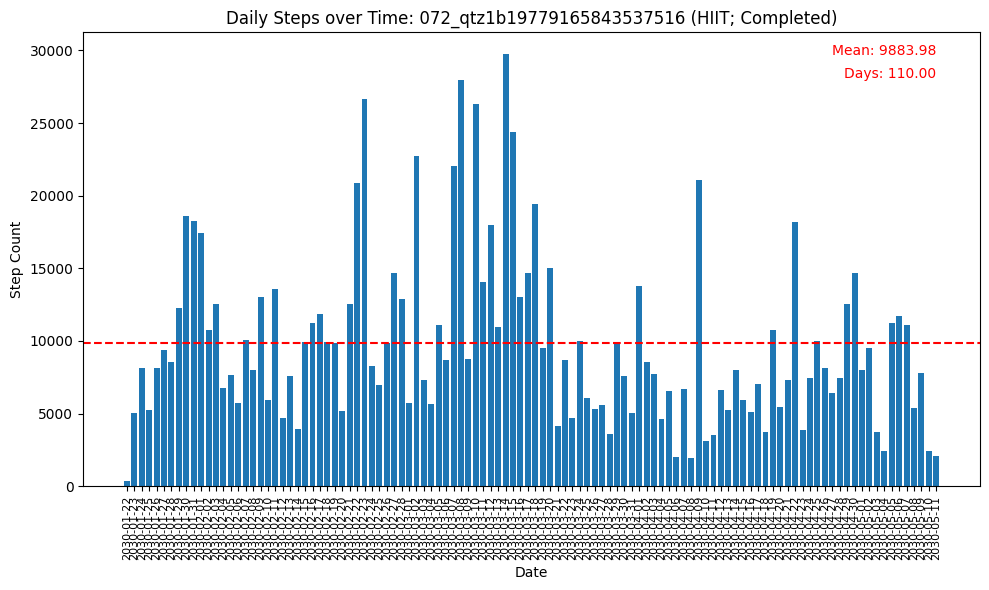

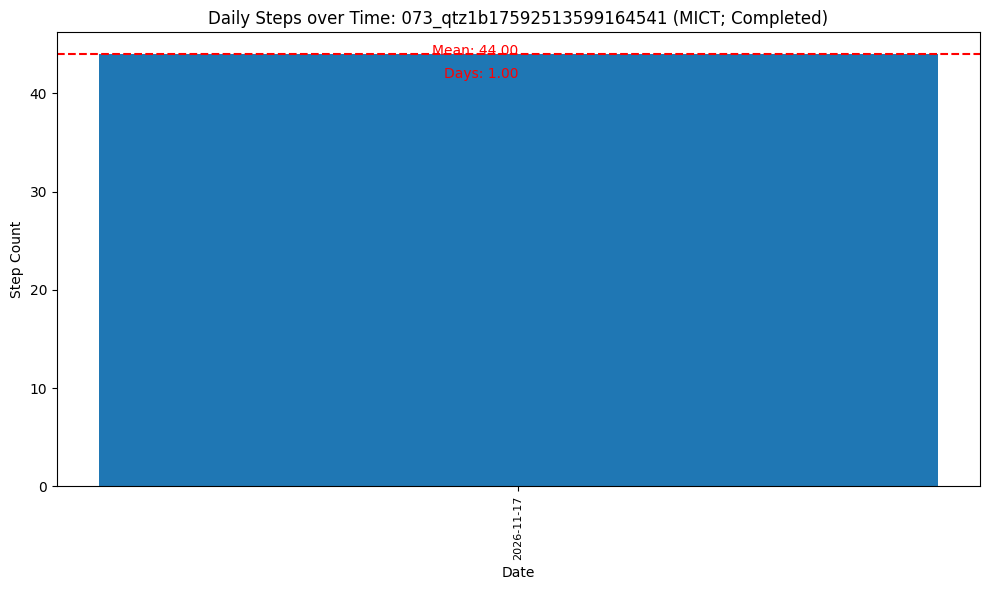

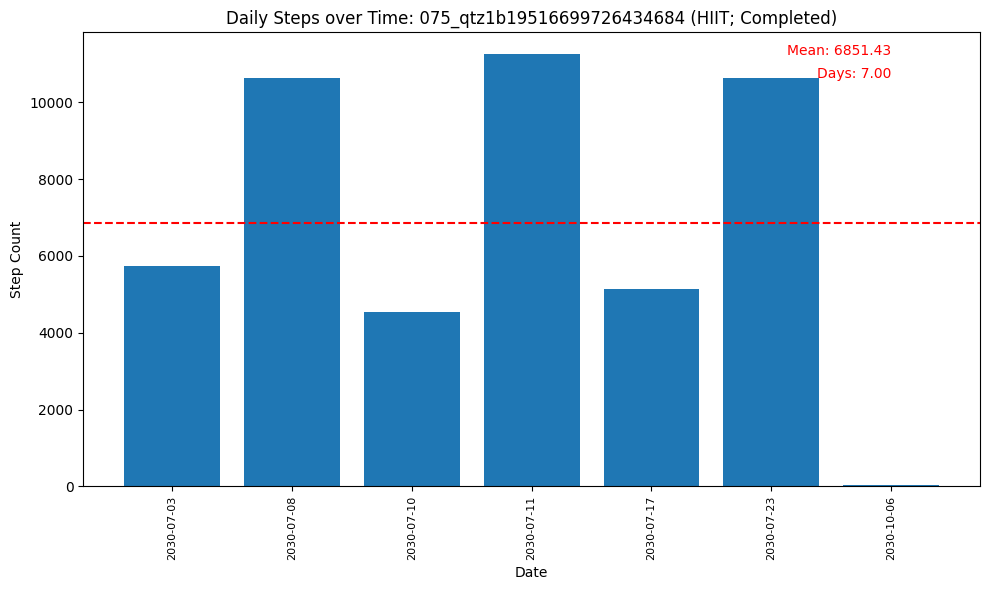

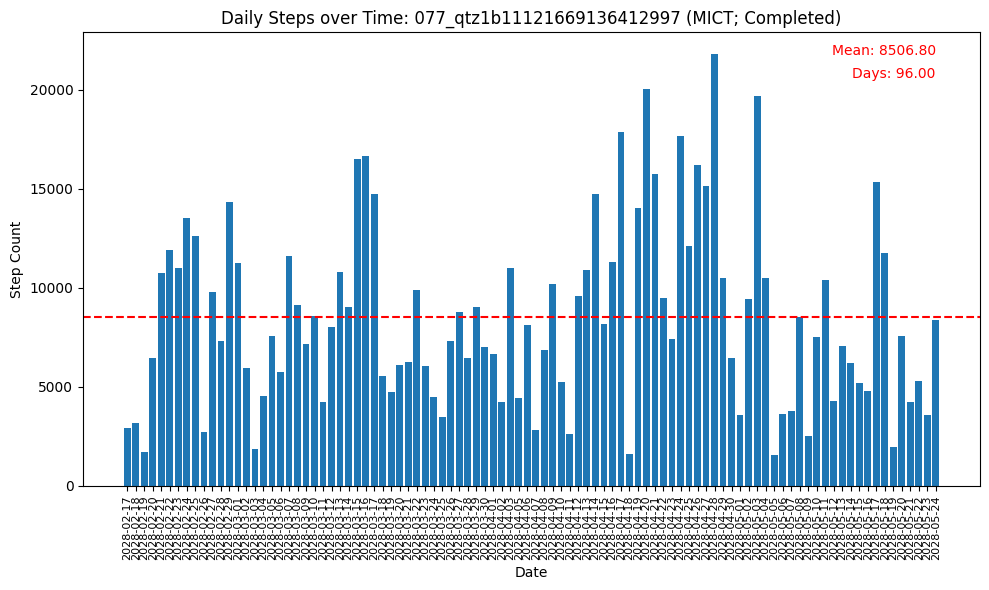

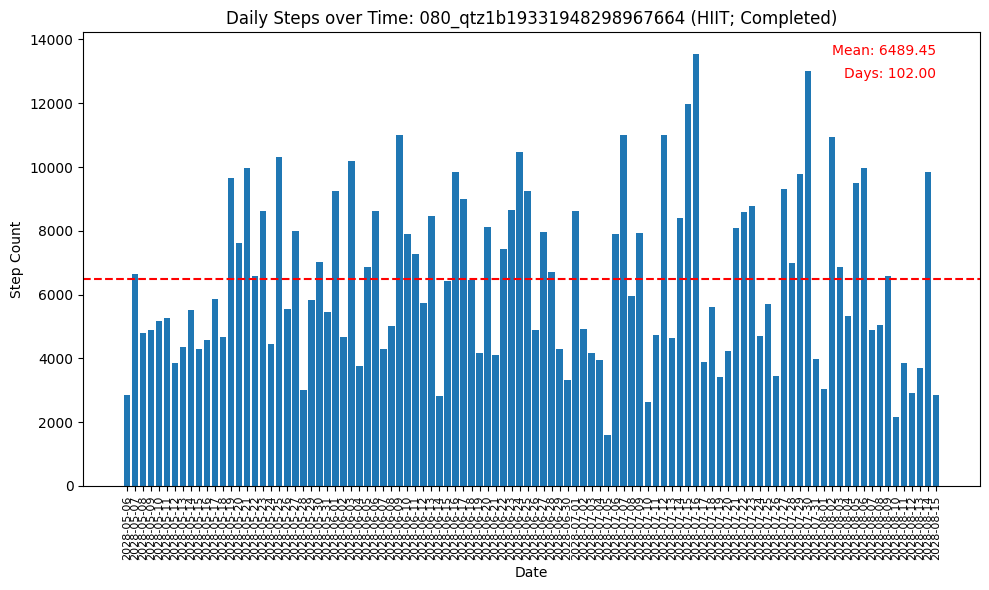

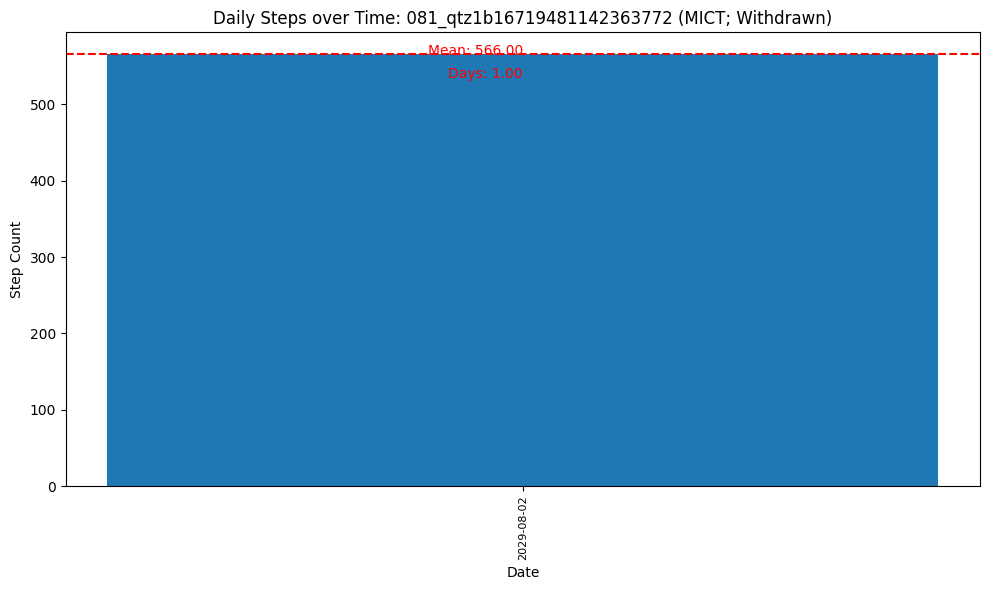

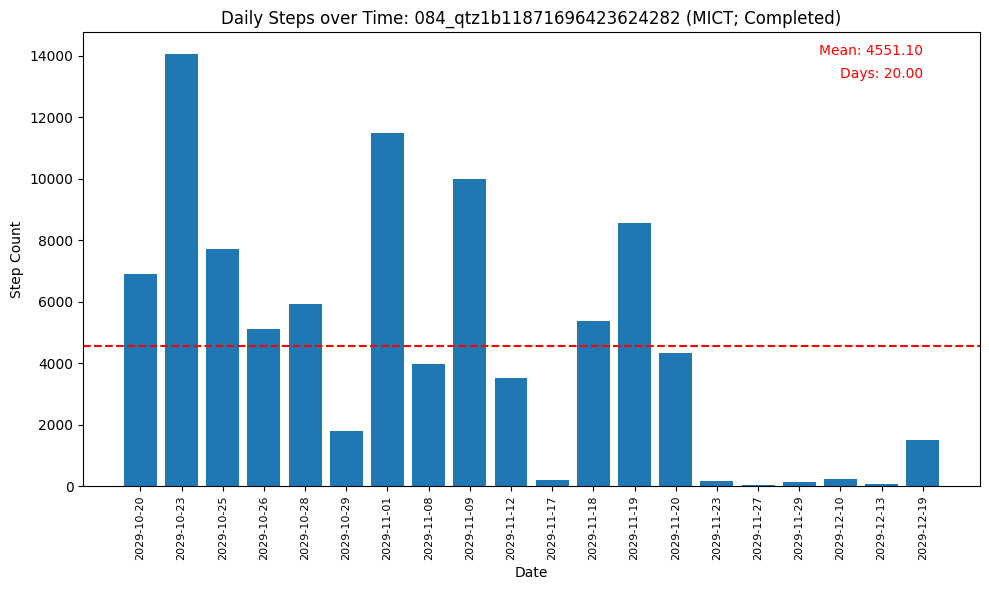

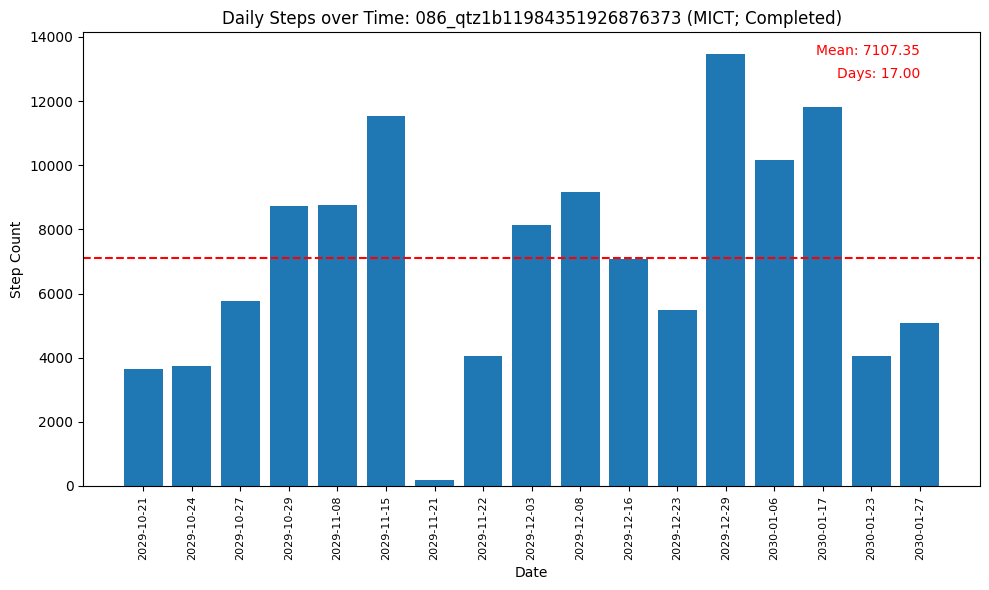

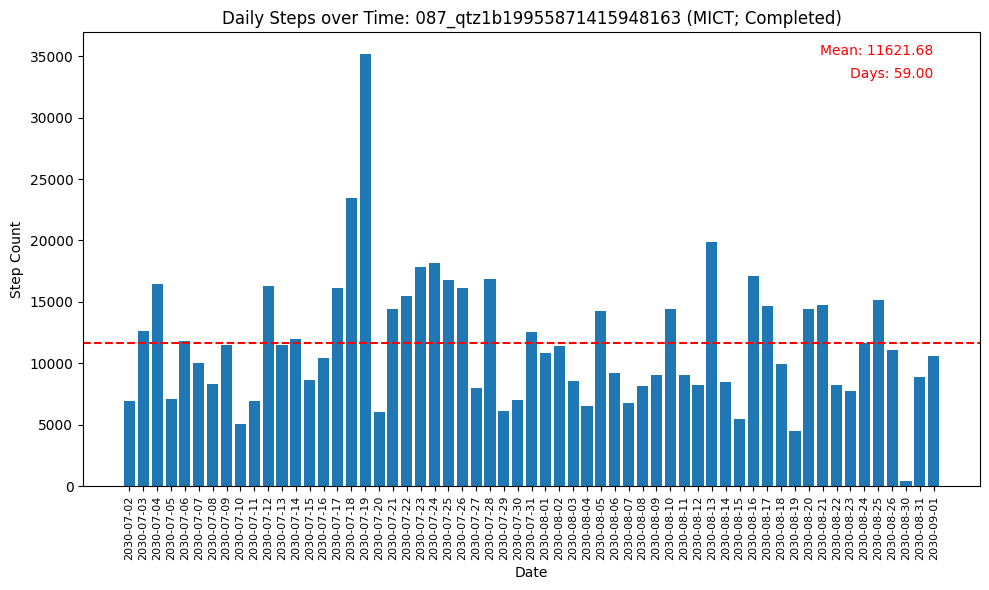

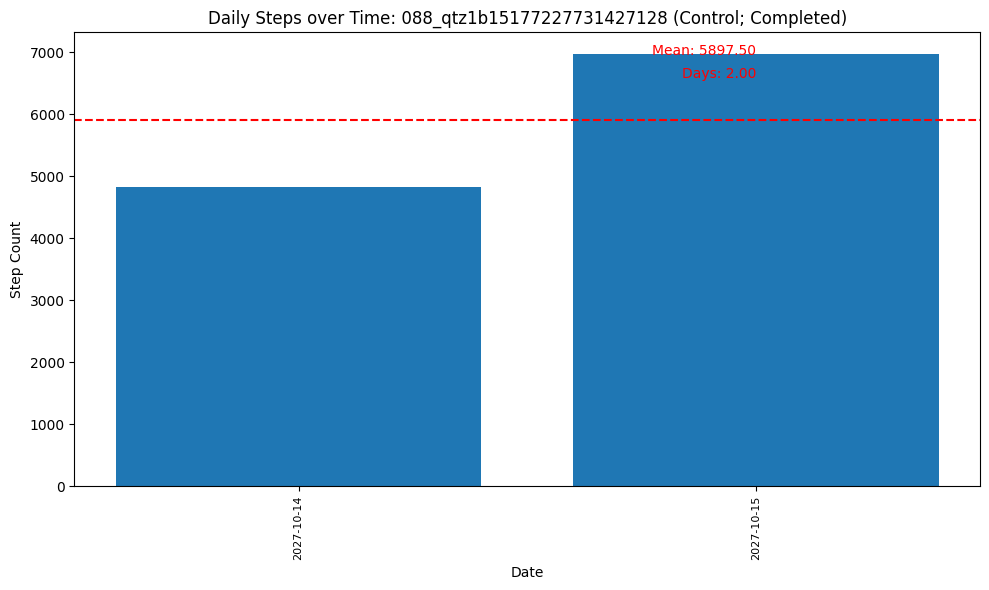

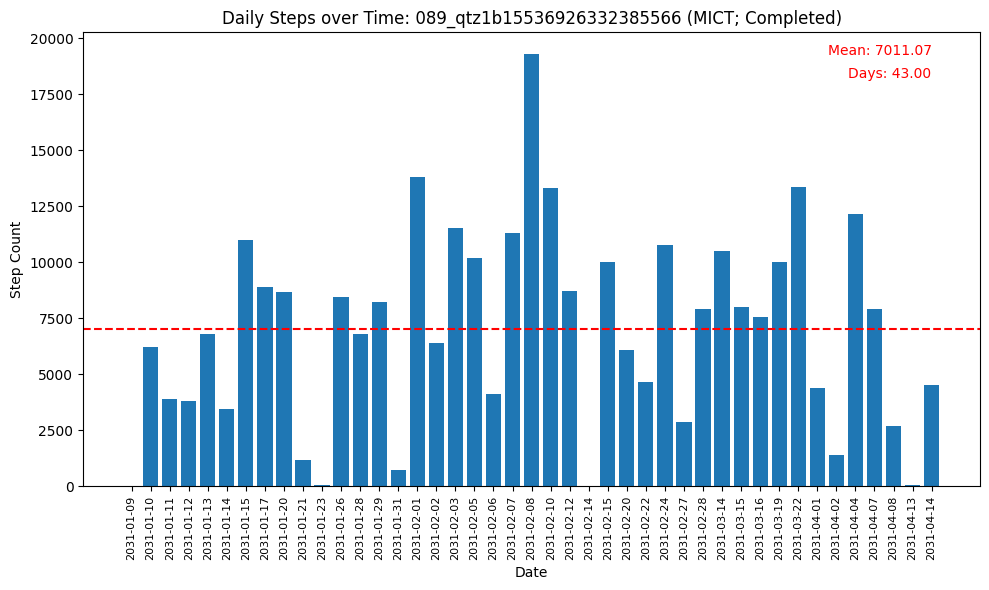

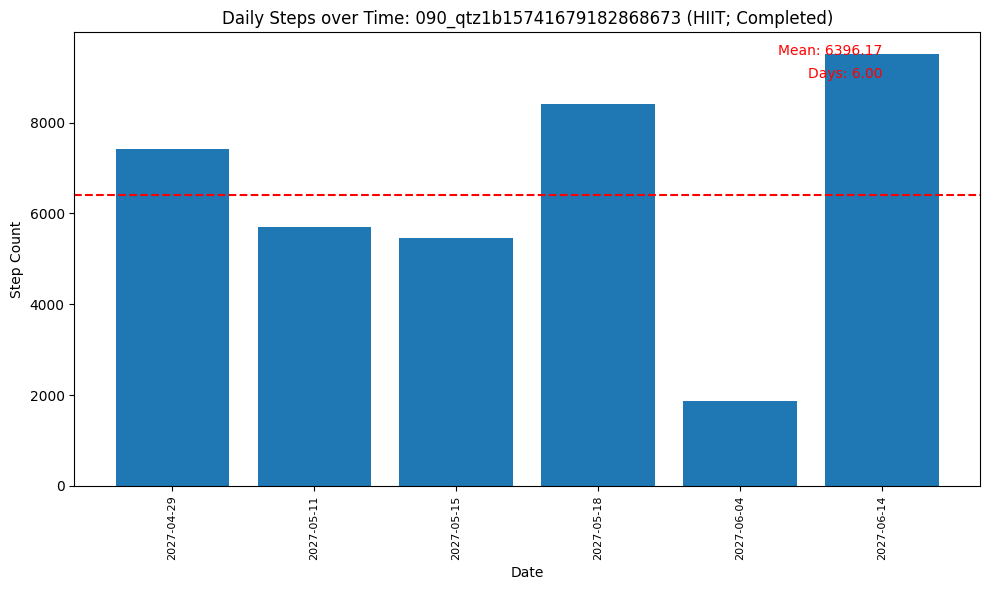

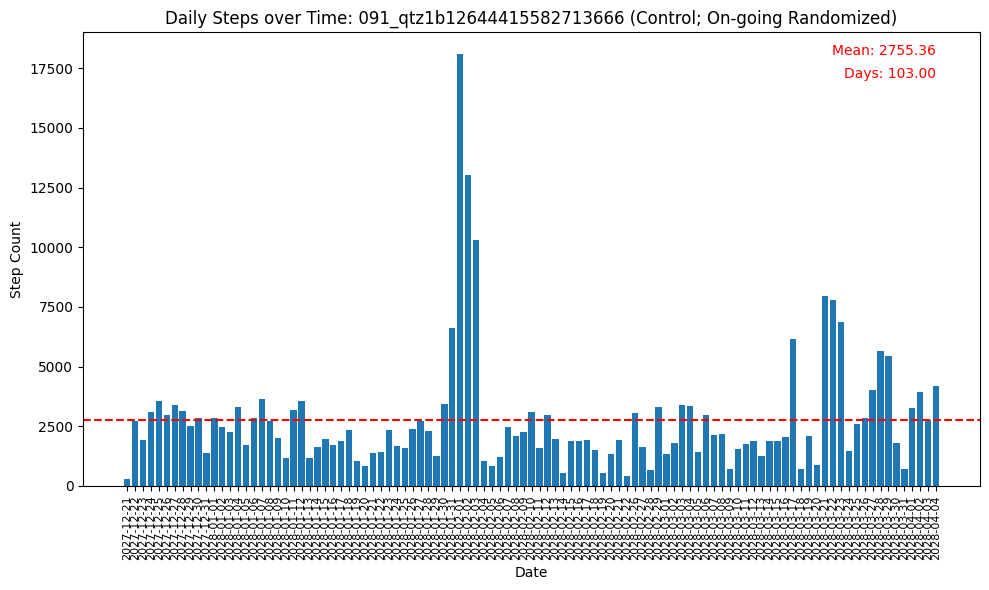

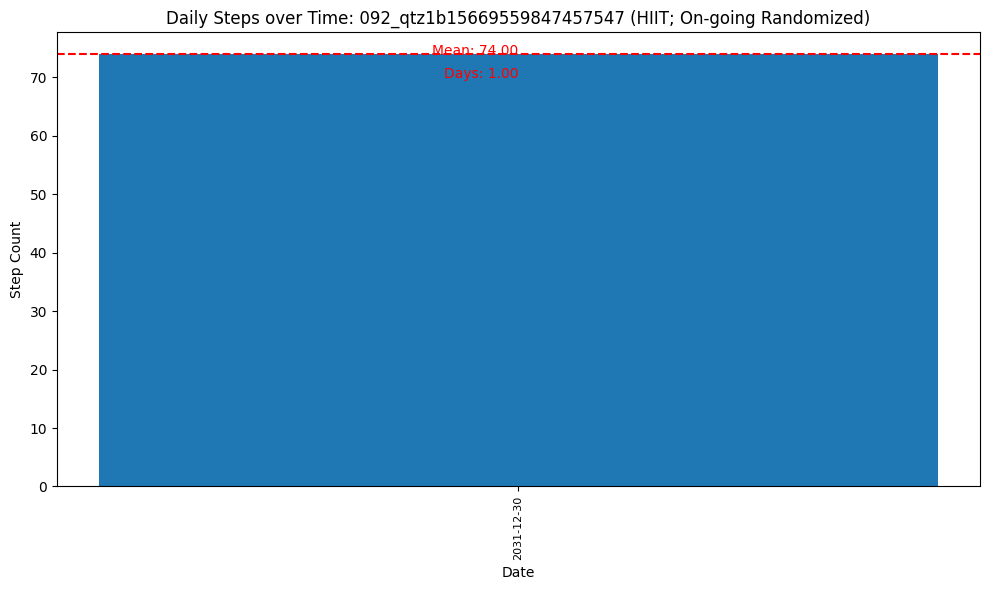

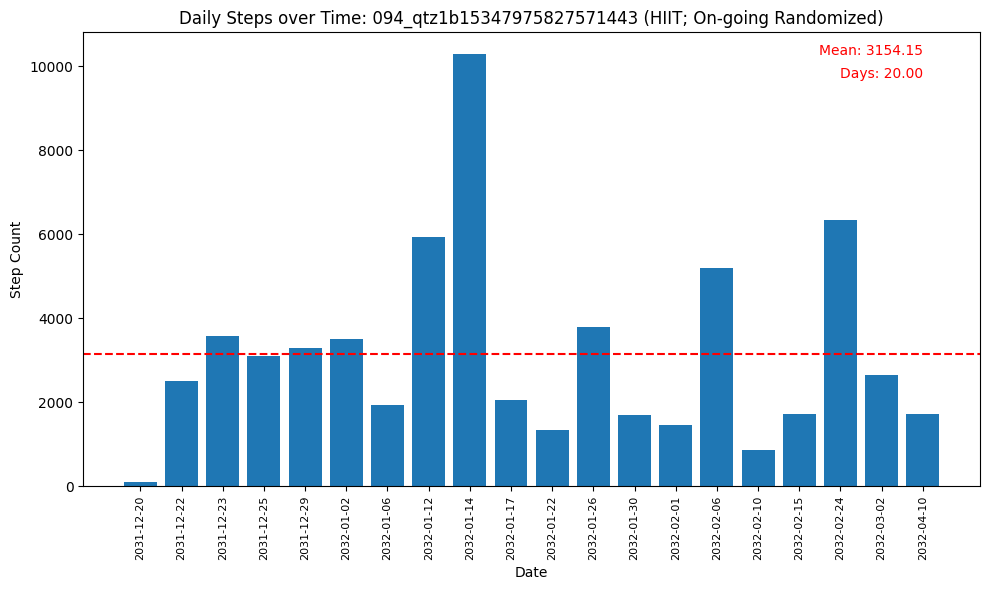

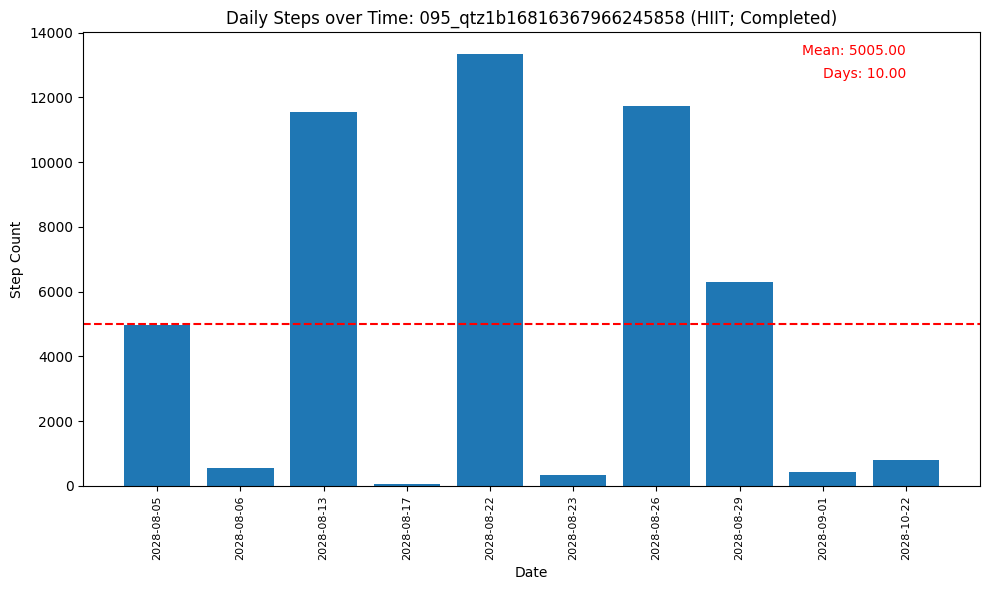

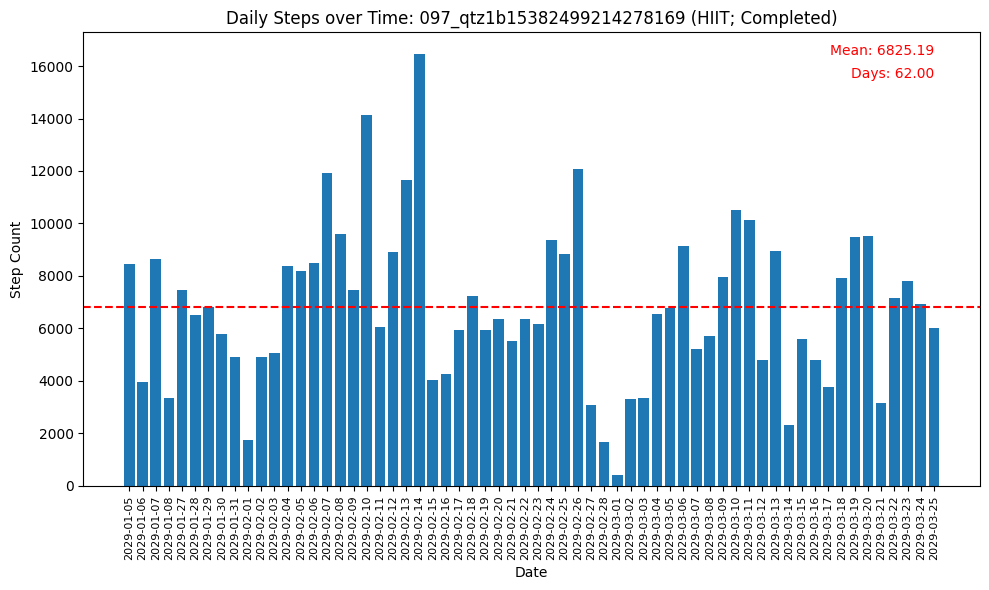

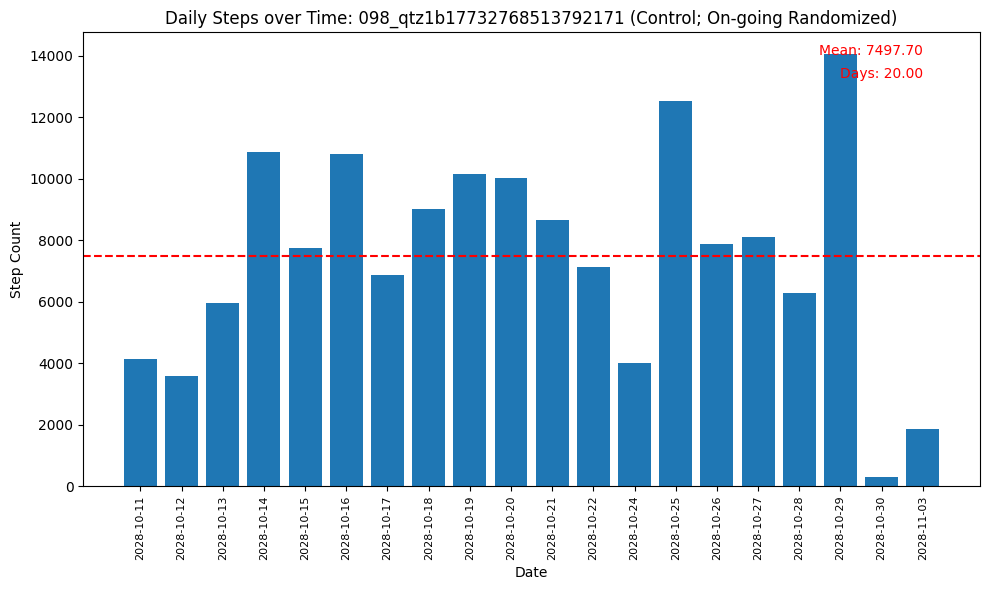

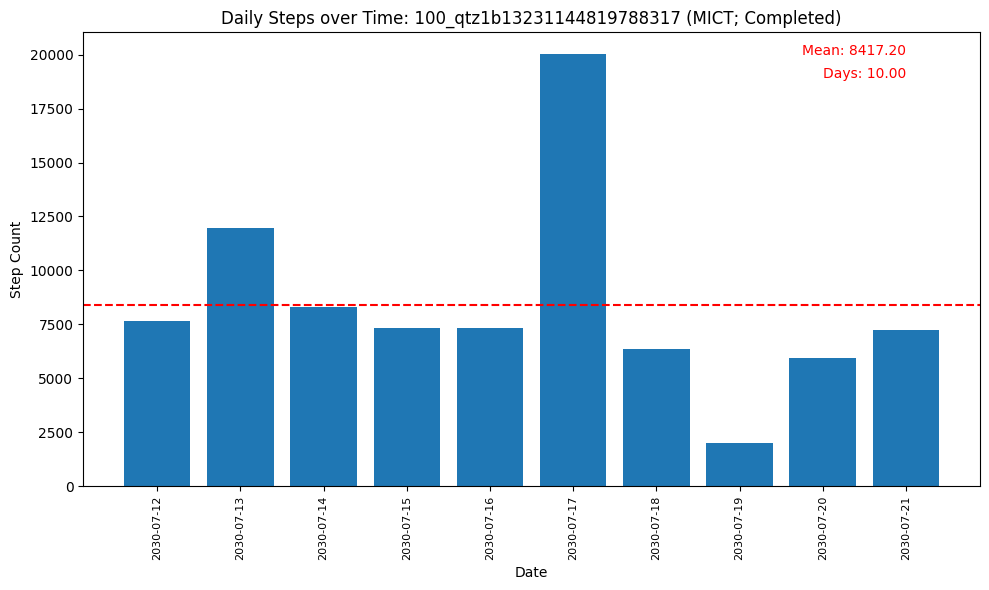

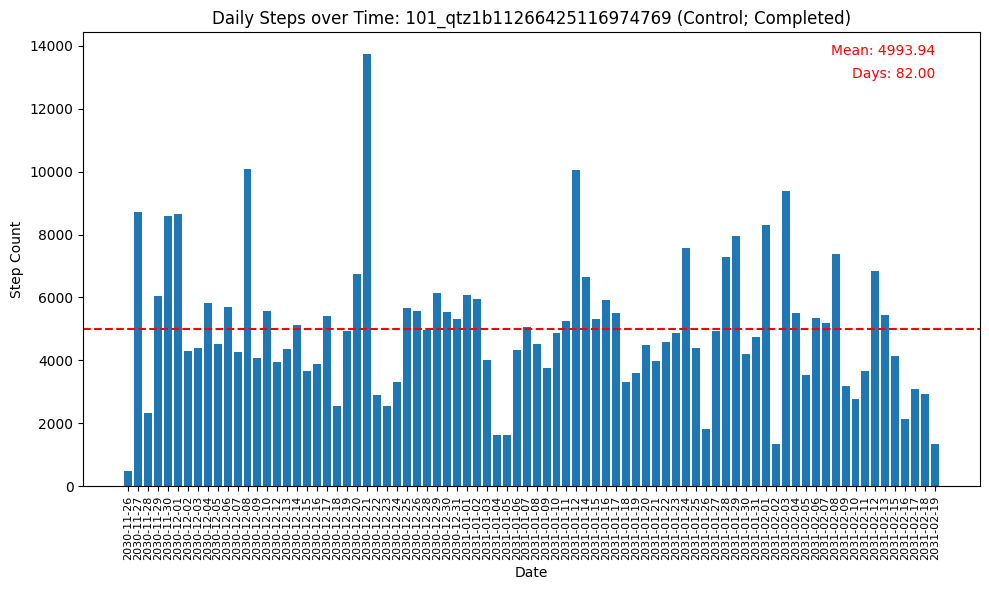

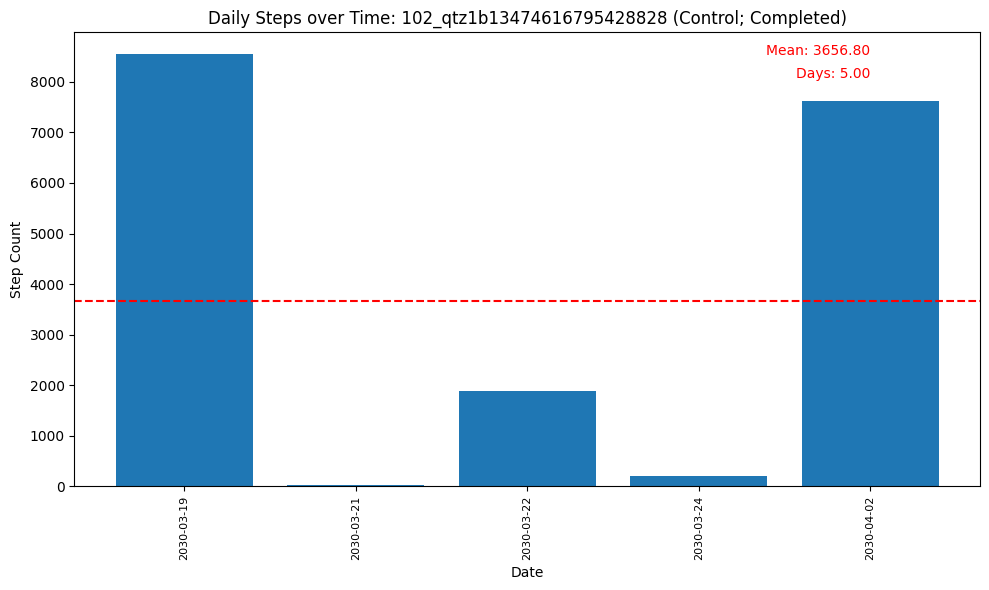

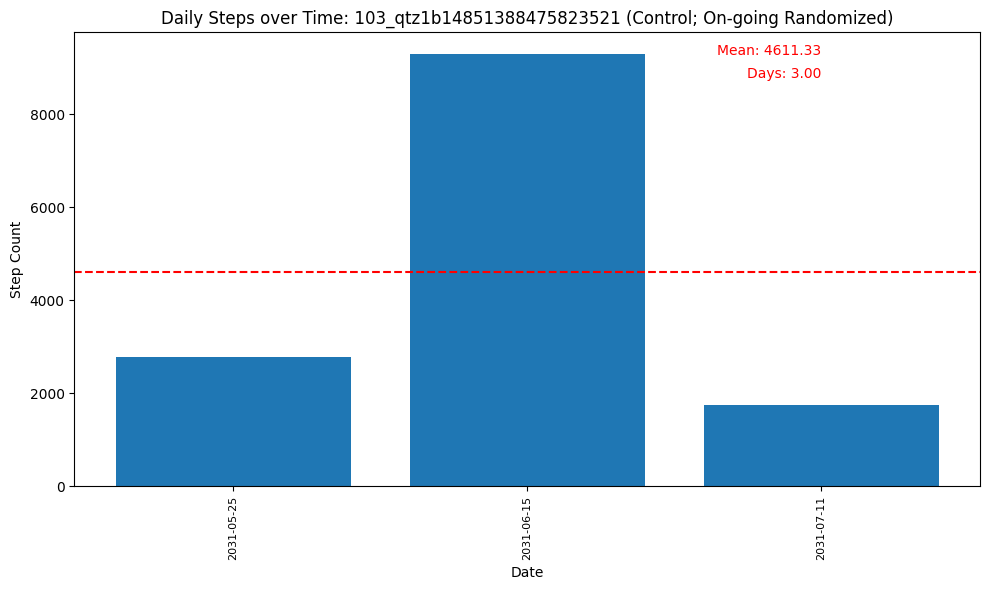

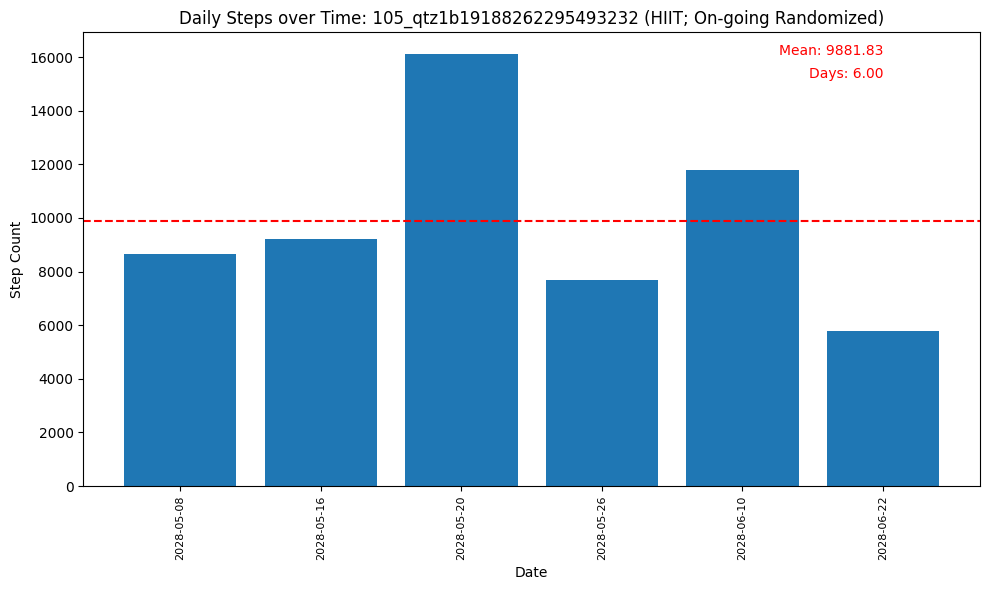

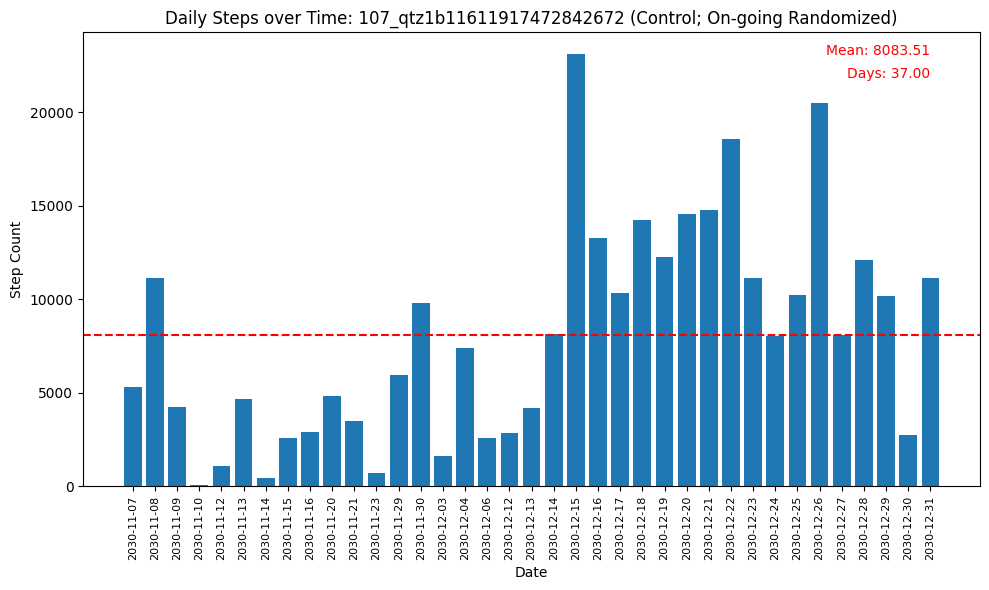

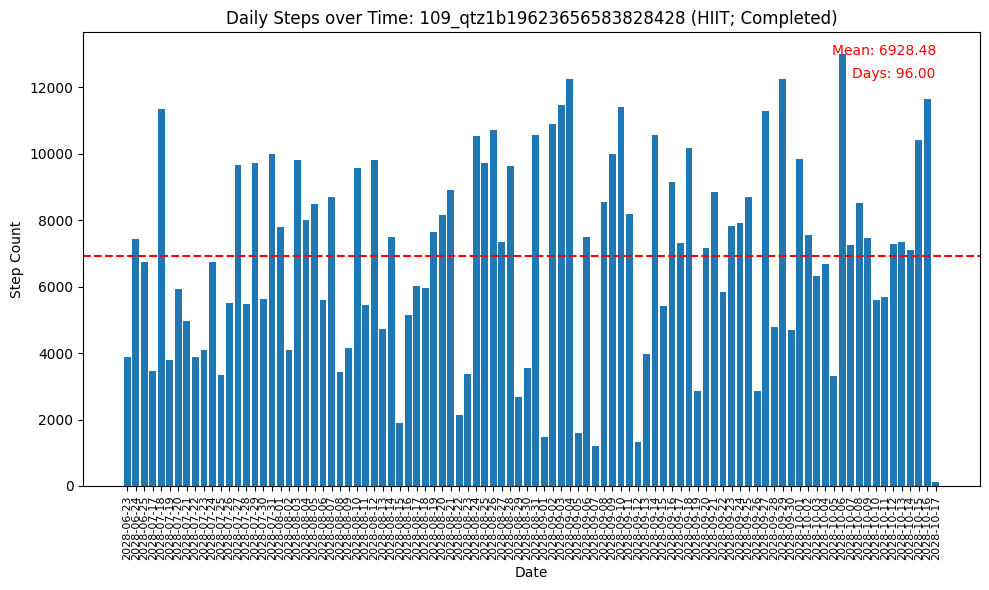

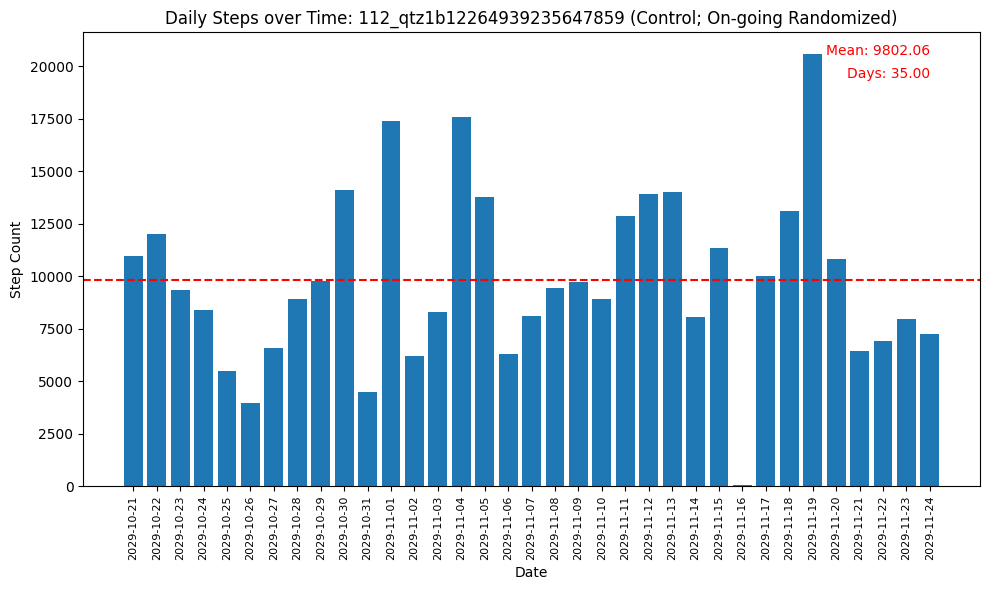

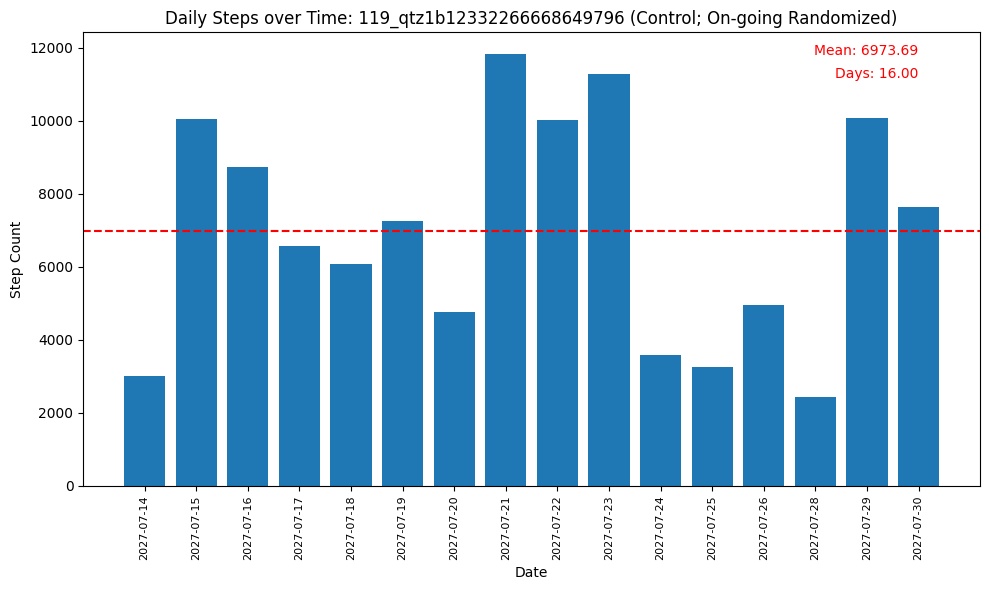

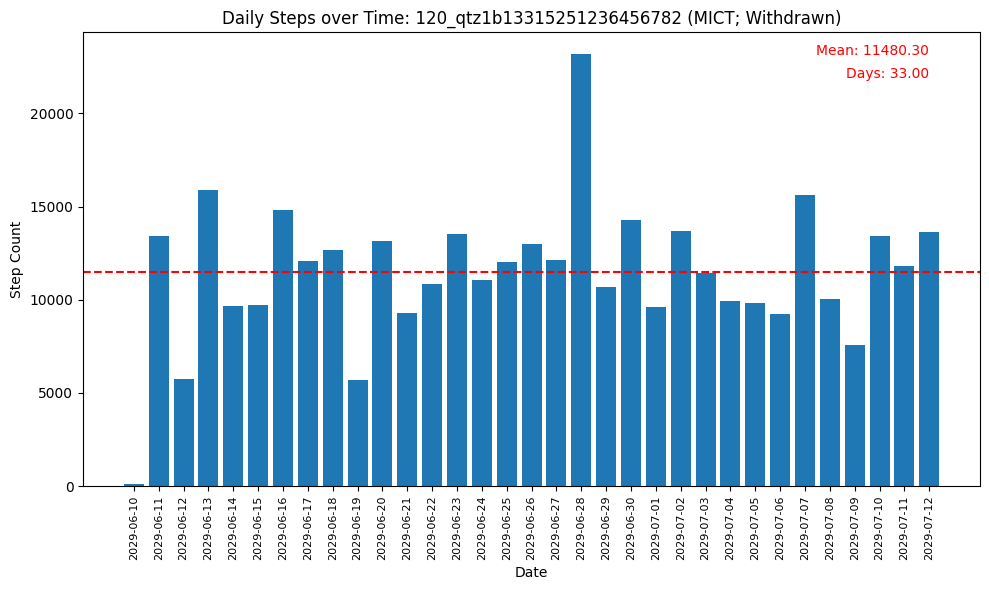

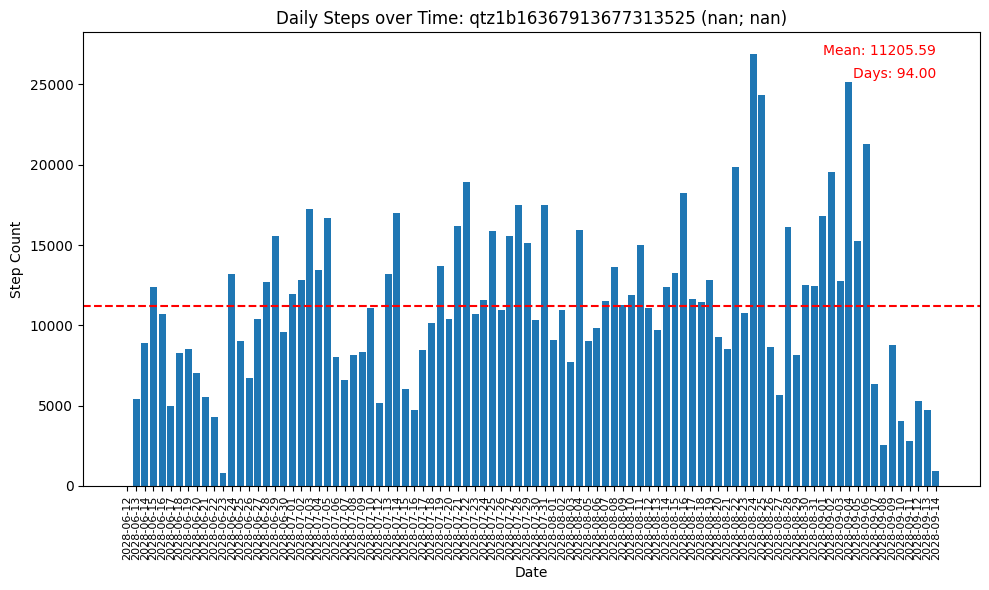

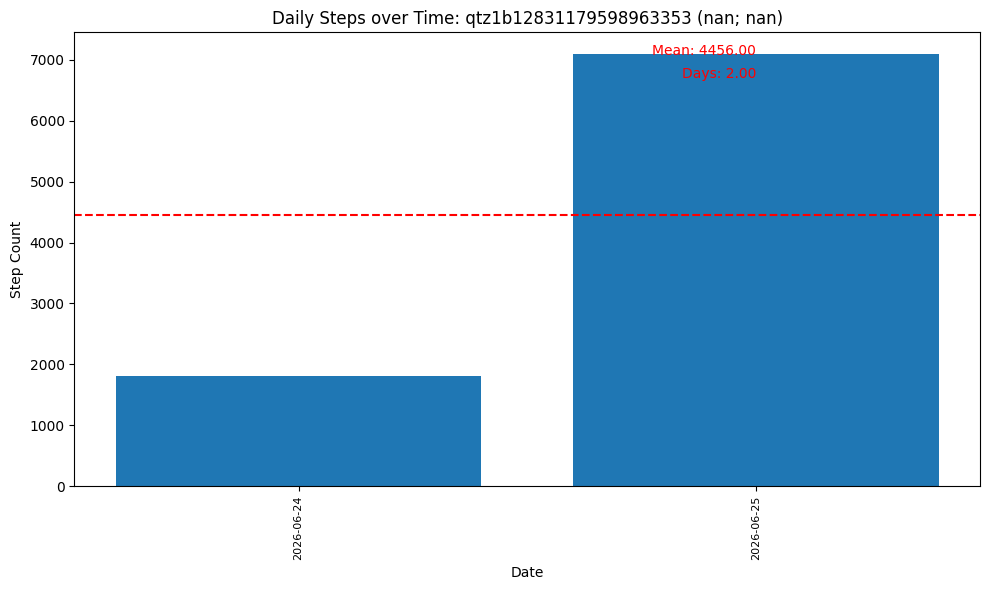

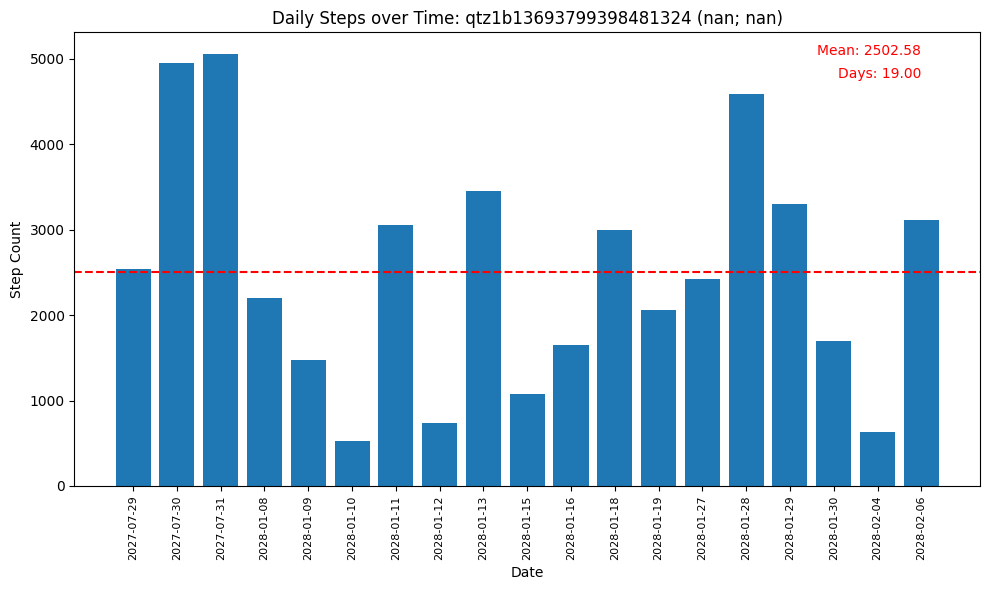

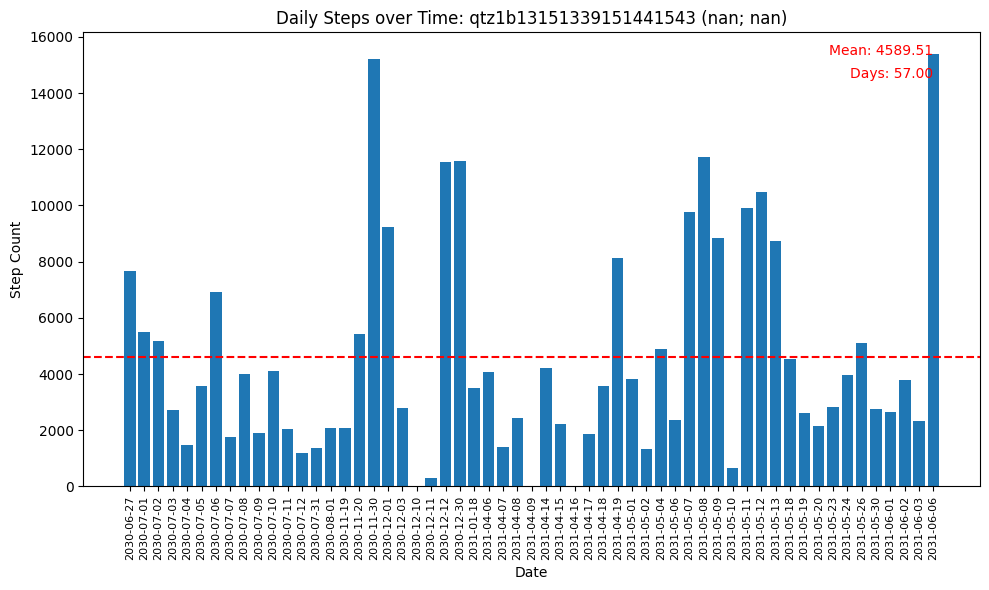

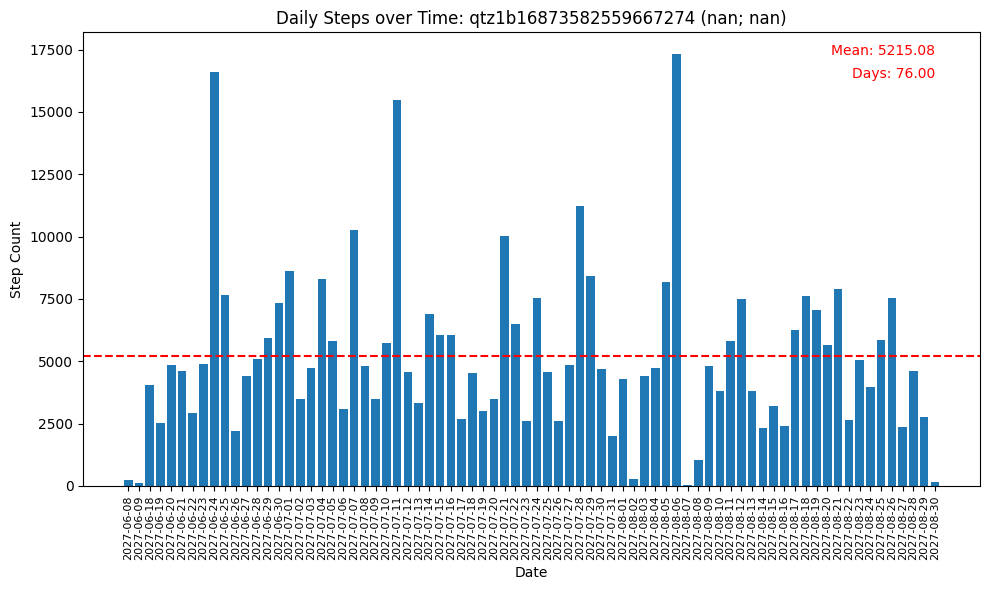

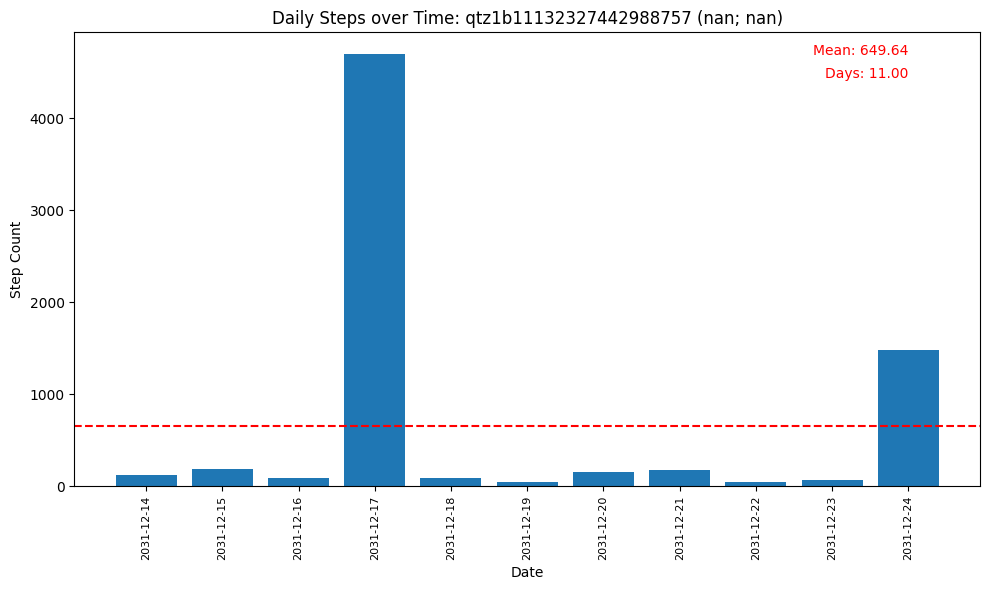

In [39]:
# Get a list of all files
step_path = f"/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/st/WearableFitbit-Fitbit/"
os.chdir(step_path)
files = []
for file in glob.glob("*.csv"):
    file = file.split('_st')[0]
    files.append(file)
    #print(files)

# Arrange by number before plotting
# Function to extract the numeric prefix if it exists
def extract_numeric_prefix(filename):
    parts = filename.split('_')
    return int(parts[0]) if parts[0].isdigit() else float('inf')

# Sort filenames by numeric prefix
sorted_filenames = sorted(files, key=extract_numeric_prefix)
sorted_filenames

# Plot the participants
for ppt in sorted_filenames:
    plot_steps(ppt)

# Summary step df

In [99]:
# Get summary df of step counts

all_data = pd.DataFrame()  # Initialize an empty DataFrame

for participant in sorted_filenames:
    step_path = f"/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/st/WearableFitbit-Fitbit/{participant}_st_WearableFitbit_Fitbit.csv"
    step_df = pd.read_csv(step_path)
        
    # Recode enrollment status
    step_df['enrollment_status']=step_df['enrollment_status'].replace({4: "On-going Randomized", 5: 'Completed', 6: 'Withdrawn', 7: 'Lost to Follow-Up'})
    step_df['randomization_group']=step_df['randomization_group'].replace({1: "HIIT", 2: "MICT", 3: "Control"})
        
    # Get metrics for ppt
    num_days = len(step_df['start_date'].unique())
    enroll = step_df['enrollment_status'][1]
    ex_group = step_df['randomization_group'][1]
    
    # Calculate num steps per day (group by start_date, sum the values for each start_date)
    group_df= step_df.groupby('start_date')['value'].sum()
    group_df=pd.DataFrame(group_df)
    mean_steps = group_df['value'].mean().round(0)
        
    metrics_df = pd.DataFrame({
            'participant': [participant],
            'enrollment_status': [enroll],
            'randomization_group': [ex_group],
            'num_ST_days': [num_days],
            'mean_steps': [mean_steps]
        })
    all_data = pd.concat([all_data, metrics_df], ignore_index=True)


st_df = all_data
st_df.sort_values(by='mean_steps')
print(st_df.groupby('randomization_group')['mean_steps'].mean())
print(st_df.groupby('randomization_group')['num_ST_days'].mean())
st_df.to_csv('/Users/aubreykr/Desktop/Fitbit_Step_Counts.csv', index=False)

randomization_group
Control    6585.666667
HIIT       6479.900000
MICT       6863.600000
Name: mean_steps, dtype: float64
randomization_group
Control    52.50
HIIT       52.25
MICT       55.95
Name: num_ST_days, dtype: float64


/var/folders/r7/jtcfw0ln6156s7dt2pw25pnr0000gq/T/ipykernel_46732/2421116851.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=st_df, x='randomization_group', y='num_ST_days', palette='Set2')


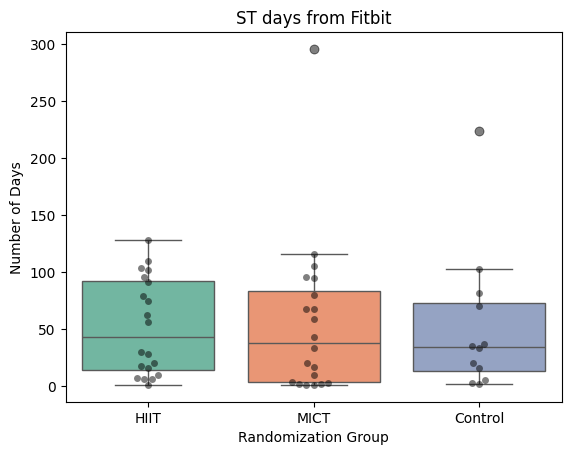

In [101]:
# Iterate through groups and plot with matplotlib
# groups = st_df.groupby('randomization_group')

# for name, group in groups:
#     plt.plot(group['randomization_group'], group['num_days'], marker='o', linestyle='', label=name)

# plt.legend(title='Randomization Group')
# plt.xlabel('Number of Days')
# plt.ylabel('Randomization Group')
# plt.title("Num days of Fitbit")
# plt.show()


# Boxplot of number of days per group with seaborn
# Create the box plot
ax = sns.boxplot(data=st_df, x='randomization_group', y='num_ST_days', palette='Set2')
# Overlay with swarm plot to show individual points
sns.swarmplot(data=st_df, x='randomization_group', y='num_ST_days', color='black', alpha=0.5)
plt.xlabel('Randomization Group')
plt.ylabel('Number of Days')
plt.title('ST days from Fitbit')
plt.show()



# Create the histogram with individual data points
# plt.figure(figsize=(10, 6))
# sns.histplot(data=st_df, x='num_days', hue='randomization_group', palette='Set2', bins=40)

# plt.xlabel('Number of Days')
# plt.ylabel('Count')
# plt.title('Num Days of Fitbit')
# plt.show()

/var/folders/r7/jtcfw0ln6156s7dt2pw25pnr0000gq/T/ipykernel_46732/1845768484.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=complete_df, x='randomization_group', y='num_ST_days', palette='Set2')


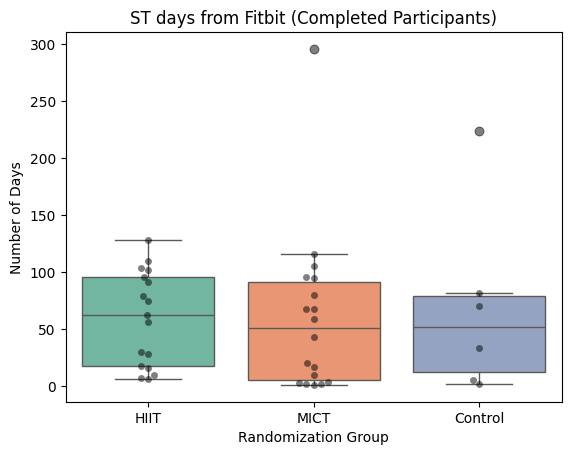

/var/folders/r7/jtcfw0ln6156s7dt2pw25pnr0000gq/T/ipykernel_46732/1845768484.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=complete_df, x='randomization_group', y='num_ST_days', palette='Set2')


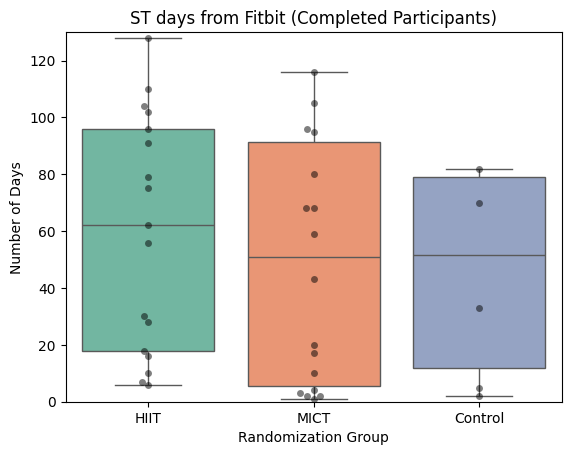

In [103]:
complete_df = st_df[st_df['enrollment_status']=="Completed"]

# Boxplot of number of days per group with seaborn
# Create the box plot
ax = sns.boxplot(data=complete_df, x='randomization_group', y='num_ST_days', palette='Set2')
# Overlay with swarm plot to show individual points
sns.swarmplot(data=complete_df, x='randomization_group', y='num_ST_days', color='black', alpha=0.5)
plt.xlabel('Randomization Group')
plt.ylabel('Number of Days')
plt.title('ST days from Fitbit (Completed Participants)')
plt.show()


# Create the box plot
ax = sns.boxplot(data=complete_df, x='randomization_group', y='num_ST_days', palette='Set2')
# Overlay with swarm plot to show individual points
sns.swarmplot(data=complete_df, x='randomization_group', y='num_ST_days', color='black', alpha=0.5)
plt.xlabel('Randomization Group')
plt.ylabel('Number of Days')
plt.title('ST days from Fitbit (Completed Participants)')
plt.ylim(0,130)
plt.show()


In [ ]:
complete_df.sort_values('num_days')

In [23]:
# Generalize into function
def plot_hr(participant):
    step_path = f"/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/{participant}_hr_WearableFitbit_Fitbit.csv"

    step_df = pd.read_csv(step_path)

    # Recode enrollment status
    step_df['enrollment_status']=step_df['enrollment_status'].replace({4: "On-going Randomized", 5: 'Completed', 6: 'Withdrawn', 7: 'Lost to Follow-Up'})
    step_df['randomization_group']=step_df['randomization_group'].replace({1: "HIIT", 2: "MICT", 3: "Control"})
        
    # Get metrics for ppt
    Num_Days = len(step_df['start_date'].unique())
    enroll = step_df['enrollment_status'][1]
    ex_group = step_df['randomization_group'][1]
    num_days = len(step_df['start_date'].unique())

    # Make plot
    plt.figure(figsize=(10, 6))
    plt.scatter(step_df['start_date'], step_df['value'])  # Line plot
    # plt.bar(group_df.index, group_df.values)  # For bar plot, uncomment this line instead
    plt.xlabel('Date')
    plt.ylabel('HR')
    plt.title(f'Heart Rate over Time: {participant} ({ex_group}; {enroll})')
    ymin, ymax = plt.ylim()
    plt.xticks(rotation=90, fontsize=8)  # Rotate x labels for better readability
    plt.text(x=group_df.index[-1], y=0.95 * ymax,  # Adjust position as needed
         s=f'Days: {Num_Days:.2f}', color='r', fontsize=10, horizontalalignment='right')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

# Plot participant HR

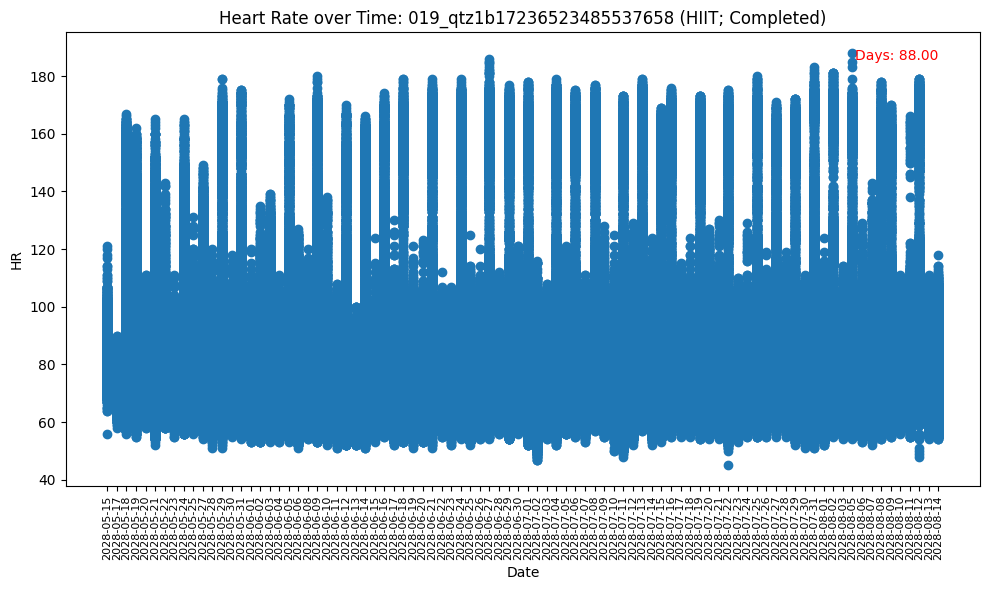

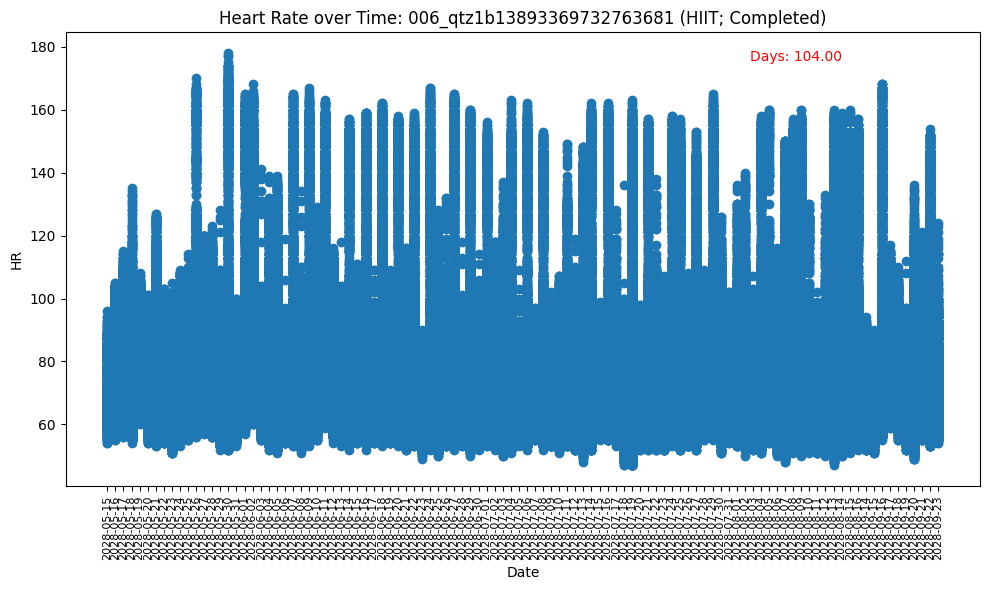

In [24]:
plot_hr("019_qtz1b17236523485537658")
plot_hr("006_qtz1b13893369732763681")

# Summary HR df

In [26]:
# Get a list of all files
step_path = f"/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/"
os.chdir(step_path)
files = []
for file in glob.glob("*.csv"):
    file = file.split('_hr')[0]
    files.append(file)
    #print(files)

# Arrange by number before plotting
# Function to extract the numeric prefix if it exists
def extract_numeric_prefix(filename):
    parts = filename.split('_')
    return int(parts[0]) if parts[0].isdigit() else float('inf')

# Sort filenames by numeric prefix
sorted_filenames = sorted(files, key=extract_numeric_prefix)
sorted_filenames


['004_qtz1b18445579426718188',
 '005_qtz1b16767772887265127',
 '006_qtz1b13893369732763681',
 '007_qtz1b18472445718468562',
 '010_qtz1b19121547781291613',
 '012_qtz1b17269433695528197',
 '014_qtz1b13168362397931536',
 '018_qtz1b19261322566215748',
 '019_qtz1b17236523485537658',
 '020_qtz1b19129928133897239',
 '021_qtz1b16327775253853113',
 '026_qtz1b12285682268619722',
 '036_qtz1b18341388618579643',
 '037_qtz1b19851346611142986',
 '040_qtz1b12182259692885175',
 '045_qtz1b14361342418376156',
 '046_qtz1b12637499885254663',
 '047_qtz1b11649673216856592',
 '050_qtz1b15781646323819351',
 '051_qtz1b16917131625167555',
 '056_qtz1b12687913936119614',
 '060_qtz1b13779232687428538',
 '070_qtz1b14637549187739211',
 '071_qtz1b19649447249479579',
 '072_qtz1b19779165843537516',
 '073_qtz1b17592513599164541',
 '075_qtz1b19516699726434684',
 '077_qtz1b11121669136412997',
 '080_qtz1b19331948298967664',
 '081_qtz1b16719481142363772',
 '084_qtz1b11871696423624282',
 '086_qtz1b11984351926876373',
 '087_qt

In [37]:
# Get summary df of HR

all_data = pd.DataFrame()  # Initialize an empty DataFrame

for participant in sorted_filenames:
    step_path = f"/Users/aubreykr/Google Drive/Shared drives/HIIT and Endurance Study/Data/data/myphd/_processed/hr/WearableFitbit-Fitbit/{participant}_hr_WearableFitbit_Fitbit.csv"
    step_df = pd.read_csv(step_path)
        
    # Recode enrollment status
    step_df['enrollment_status']=step_df['enrollment_status'].replace({4: "On-going Randomized", 5: 'Completed', 6: 'Withdrawn', 7: 'Lost to Follow-Up'})
    step_df['randomization_group']=step_df['randomization_group'].replace({1: "HIIT", 2: "MICT", 3: "Control"})
        
    # Get metrics for ppt
    num_days = len(step_df['start_date'].unique())
    enroll = step_df['enrollment_status'][1]
    ex_group = step_df['randomization_group'][1]
    
    # Calculate num steps per day (group by start_date, sum the values for each start_date)
        
    metrics_df = pd.DataFrame({
            'participant': [participant],
            'enrollment_status': [enroll],
            'randomization_group': [ex_group],
            'num_hr_days': [num_days],
        })
    all_data = pd.concat([all_data, metrics_df], ignore_index=True)


hr_df = all_data
hr_df.sort_values(by='num_hr_days')
print(hr_df.groupby('randomization_group')['num_hr_days'].mean())

hr_df.to_csv('/Users/aubreykr/Desktop/Fitbit_HR_Days.csv', index=False)

randomization_group
Control    52.785714
HIIT       45.952381
MICT       40.500000
Name: num_hr_days, dtype: float64


In [68]:
hr_df.sort_values('num_hr_days', ascending=False)
st_df.sort_values('num_ST_days', ascending=False)
df = pd.merge(hr_df, st_df, on=['participant', 'enrollment_status', 'randomization_group'])
df

,participant,enrollment_status,randomization_group,num_hr_days,num_ST_days,mean_steps
0,004_qtz1b18445579426718188,Completed,HIIT,31,30,5951.0
1,005_qtz1b16767772887265127,Completed,MICT,3,3,4611.0
2,006_qtz1b13893369732763681,Completed,HIIT,104,104,8982.0
3,007_qtz1b18472445718468562,Completed,MICT,95,95,13438.0
4,010_qtz1b19121547781291613,Completed,HIIT,44,75,3394.0
5,012_qtz1b17269433695528197,Completed,MICT,1,4,7130.0
6,014_qtz1b13168362397931536,Completed,HIIT,24,28,3740.0
7,018_qtz1b19261322566215748,Completed,MICT,117,116,10891.0
8,019_qtz1b17236523485537658,Completed,HIIT,88,91,9255.0
9,020_qtz1b19129928133897239,Completed,HIIT,16,16,3869.0


# Combine steps and hr df for Fitbit

In [69]:
df = df.sort_values('num_hr_days', ascending=False)
df.to_csv('/Users/aubreykr/Desktop/Fitbit_Days.csv', index=False)

Text(0.5, 1.0, 'Fitbit: Days with HR vs. Days with Steps')

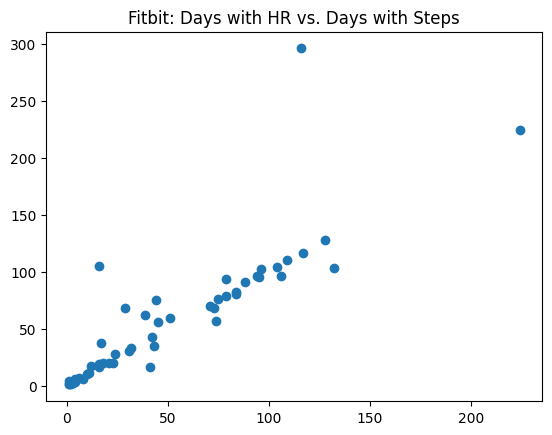

In [76]:
plt.scatter(x=df['num_hr_days'], y=df['num_ST_days'])
plt.title("Fitbit: Days with HR vs. Days with Steps")

/var/folders/r7/jtcfw0ln6156s7dt2pw25pnr0000gq/T/ipykernel_46732/1098257298.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=complete_df, x='randomization_group', y='num_hr_days', palette='Set2')


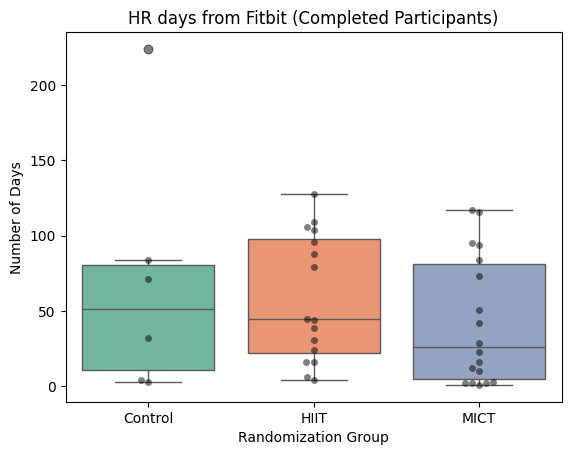

/var/folders/r7/jtcfw0ln6156s7dt2pw25pnr0000gq/T/ipykernel_46732/1098257298.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=complete_df, x='randomization_group', y='num_hr_days', palette='Set2')


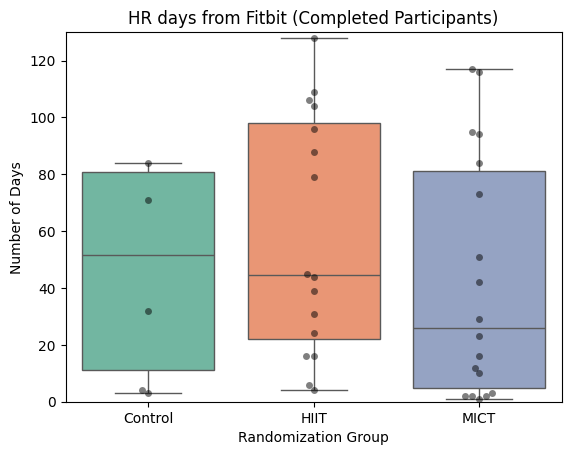

In [104]:
import seaborn as sns


complete_df = df[df['enrollment_status']=="Completed"]

# Boxplot of number of days per group with seaborn
# Create the box plot
ax = sns.boxplot(data=complete_df, x='randomization_group', y='num_hr_days', palette='Set2')
# Overlay with swarm plot to show individual points
sns.swarmplot(data=complete_df, x='randomization_group', y='num_hr_days', color='black', alpha=0.5)
plt.xlabel('Randomization Group')
plt.ylabel('Number of Days')
plt.title('HR days from Fitbit (Completed Participants)')
plt.show()



# Create the box plot
ax = sns.boxplot(data=complete_df, x='randomization_group', y='num_hr_days', palette='Set2')
# Overlay with swarm plot to show individual points
sns.swarmplot(data=complete_df, x='randomization_group', y='num_hr_days', color='black', alpha=0.5)
plt.xlabel('Randomization Group')
plt.ylabel('Number of Days')
plt.title('HR days from Fitbit (Completed Participants)')
plt.ylim(0,130)
plt.show()

In [94]:
# Group by 'randomization_group' and calculate the mean of 'num_hr_days'
mean_hr_days = hr_df.groupby('randomization_group')['num_hr_days'].mean().to_frame()
print(mean_hr_days)
mean_st_days = st_df.groupby('randomization_group')['num_ST_days'].mean().to_frame()
print(mean_st_days)


                     num_hr_days
randomization_group             
Control                52.785714
HIIT                   45.952381
MICT                   40.500000
                     num_ST_days
randomization_group             
Control                    52.50
HIIT                       52.25
MICT                       55.95
